# Telecom Case Study - Anand Mathur ( Single Person Study) 

## Overview

### Business problem overview

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.
The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 
The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful

### High-value churn churn</b>

<i>Usage-based churn</i>: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time. Customers who have no incoming or outgoing in 4th month are to be tagged as "Churn"

<i>Define high-value customers as follows</i>: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).



### Business Objectives

The following are stated as objectives. 

1. Identtify High value customers
2. Predict whether high value customers will churn or not based on the data provided. Month 6, 7 are good phase, month 8 is action phase and month 9 is churn phase for this data. 
3. Build models that can predict churn on also identify key attributes that contribute to churn. 
4. Provide key insights to business and reccomend strategies to reduce churn.


### Other Objectives of the case study 


1. Perfrom Exploratory analysis 
2. Derive new features as per business requiremnt.
3. Use PCA to reduce complexity 
4. Tune various models
5. Treat for class imbalance. 
6. Create models for both predicting churn and also finding key variables 


# Exploratory Data Analysis

# 1. Importing all Libreries, viewing the data

In [1]:
import numpy as np
import pandas as pd

# for plotting 
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',250)
pd.set_option('display.max_rows',400)
pd.options.display.float_format = '{:.4f}'.format
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight') 

# For Modle building 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC

# for imputing missing values
from sklearn.impute import KNNImputer

# for Gridsearch 
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold,StratifiedKFold,RandomizedSearchCV

# For PCA
from sklearn.decomposition import PCA,IncrementalPCA

# for evaluating modle matrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import precision_score,recall_score, precision_recall_curve,roc_auc_score,roc_curve
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

# for evaluating imbalance 
from imblearn.over_sampling import SMOTE,RandomOverSampler,ADASYN

# for scaling 
from sklearn.preprocessing import StandardScaler,MinMaxScaler



In [2]:
telecom = pd.read_csv('telecom_churn_data.csv', )

In [3]:
telecom.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [4]:
telecom.rename(columns={'aug_vbc_3g':'vbc_3g_8','jul_vbc_3g':'vbc_3g_7','jun_vbc_3g':'vbc_3g_6','sep_vbc_3g':'vbc_3g_9'}, inplace=True)

In [5]:
telecom.shape

(99999, 226)

In [6]:
#Createing month lists vars
month_6 = []
month_7 = []
month_8 = []
month_9 = []
for i in telecom.columns:
    if i.endswith('6'):
        month_6.append(i)
    if i.endswith('7'):
        month_7.append(i)
    if i.endswith('8'):
        month_8.append(i)
    if i.endswith('9'):
        month_9.append(i)

In [7]:
telecom.isnull().sum()*100/len(telecom.index)

mobile_number               0.0000
circle_id                   0.0000
loc_og_t2o_mou              1.0180
std_og_t2o_mou              1.0180
loc_ic_t2o_mou              1.0180
last_date_of_month_6        0.0000
last_date_of_month_7        0.6010
last_date_of_month_8        1.1000
last_date_of_month_9        1.6590
arpu_6                      0.0000
arpu_7                      0.0000
arpu_8                      0.0000
arpu_9                      0.0000
onnet_mou_6                 3.9370
onnet_mou_7                 3.8590
onnet_mou_8                 5.3781
onnet_mou_9                 7.7451
offnet_mou_6                3.9370
offnet_mou_7                3.8590
offnet_mou_8                5.3781
offnet_mou_9                7.7451
roam_ic_mou_6               3.9370
roam_ic_mou_7               3.8590
roam_ic_mou_8               5.3781
roam_ic_mou_9               7.7451
roam_og_mou_6               3.9370
roam_og_mou_7               3.8590
roam_og_mou_8               5.3781
roam_og_mou_9       

In [8]:
def Null_values(x):    
    k = pd.DataFrame(telecom.isnull().sum()/len(telecom.index))
    k.index.name = 'Feature'
    k.columns=["Missing"]
    k=k.sort_values(by='Missing', ascending=False)
    k=k[k.Missing>x]
    return k, list(k.index)

## 1.1 Target Data frame

#### Since the data set is huge we should first do the following
1. Trim the data set by the defination of High value: As mentioned above, you need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

2. Define the Churn Variable : hurned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:<b>total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9</b>


In [9]:
# High Value identification

telecom['total_rech_amt_6_7_avg'] = (telecom.total_rech_amt_6+telecom.total_rech_amt_7)/2

In [10]:
telecom = telecom[telecom['total_rech_amt_6_7_avg']>telecom['total_rech_amt_6_7_avg'].quantile(0.7)]

In [11]:
telecom.drop(columns=['total_rech_amt_6_7_avg'], inplace=True, axis=1)

In [12]:
telecom.shape

(29979, 226)

In [13]:
telecom[(telecom.total_ic_mou_9==0.0) & (telecom.total_og_mou_9==0.0) & (telecom.vol_2g_mb_9==0) & (telecom.vol_3g_mb_9==0)]

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9
7,7000701601,109,0.0000,0.0000,0.0000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.1800,1349.8500,3171.4800,500.0000,57.8400,54.6800,52.2900,NaN,453.4300,567.1600,325.9100,NaN,16.2300,33.4900,31.6400,NaN,23.7400,12.5900,38.0600,NaN,51.3900,31.3800,40.2800,NaN,308.6300,447.3800,162.2800,NaN,62.1300,55.1400,53.2300,NaN,0.0000,0.0000,0.0000,NaN,422.1600,533.9100,255.7900,NaN,4.3000,23.2900,12.0100,NaN,49.8900,31.7600,49.1400,NaN,6.6600,20.0800,16.6800,NaN,0.0000,0.0000,0.0000,NaN,60.8600,75.1400,77.8400,NaN,0.0000,0.1800,10.0100,NaN,4.5000,0.0000,6.5000,NaN,0.0000,0.0000,0.0000,NaN,487.5300,609.2400,350.1600,0.0000,58.1400,32.2600,27

In [14]:
print ("The % of High Value that Churm are:",round(len(telecom[(telecom.total_ic_mou_9==0.0) & (telecom.total_og_mou_9==0.0) & (telecom.vol_2g_mb_9==0) & (telecom.vol_3g_mb_9==0)])*100/len(telecom),2))

The % of High Value that Churm are: 8.64


In [15]:
#defining a function to label the churn column

def Churn (x):
    if x['total_ic_mou_9']+x['total_og_mou_9']+x['vol_2g_mb_9']+x['vol_3g_mb_9']==0:
        return 1
    else:
        return 0

In [16]:
telecom["Churn"] = telecom.apply(Churn, axis=1)

In [17]:
telecom.Churn.value_counts()

0    27390
1     2589
Name: Churn, dtype: int64

In [18]:
# dropping all columns with month 9 since churn is derived

telecom.drop(columns=month_9, inplace=True, axis=1)
telecom.drop(columns=["mobile_number","circle_id"], inplace=True, axis=1)

Data frame is now ready for further clean up 

## 1.2 Treating  missing values

We can first drop all columsn with date since that has no impact on the computation

In [19]:
telecom.drop(columns=['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'], inplace=True, axis=1)

#### Lets first see the missing values which have more than 50 % missing 

In [20]:
Null_values(0.5)[0]

,Missing
Feature,
night_pck_user_6,0.6202
max_rech_data_6,0.6202
arpu_2g_6,0.6202
fb_user_6,0.6202
total_rech_data_6,0.6202
arpu_3g_6,0.6202
count_rech_2g_6,0.6202
av_rech_amt_data_6,0.6202
count_rech_3g_6,0.6202


- These look missing because the these specific services have not been used by the users. 
- So for the purpose of this case study they should be imputed to 0

In [21]:
Cols_mis = Null_values(0.5)[1]

In [22]:
Cols_mis

['night_pck_user_6',
 'max_rech_data_6',
 'arpu_2g_6',
 'fb_user_6',
 'total_rech_data_6',
 'arpu_3g_6',
 'count_rech_2g_6',
 'av_rech_amt_data_6',
 'count_rech_3g_6',
 'arpu_2g_7',
 'arpu_3g_7',
 'av_rech_amt_data_7',
 'night_pck_user_7',
 'count_rech_2g_7',
 'max_rech_data_7',
 'fb_user_7',
 'total_rech_data_7',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_2g_8',
 'av_rech_amt_data_8',
 'max_rech_data_8',
 'arpu_3g_8',
 'arpu_2g_8',
 'total_rech_data_8',
 'fb_user_8',
 'night_pck_user_8']

In [23]:
for i in Cols_mis:
    telecom[i].fillna(value=0, inplace=True)

In [24]:
Null_values(0.5)[0]

,Missing
Feature,


In [25]:
Null_values(0)[0]

,Missing
Feature,
std_ic_t2f_mou_8,0.0313
spl_og_mou_8,0.0313
loc_og_t2c_mou_8,0.0313
loc_og_mou_8,0.0313
std_og_t2t_mou_8,0.0313
std_og_t2m_mou_8,0.0313
std_og_t2f_mou_8,0.0313
std_og_t2c_mou_8,0.0313
std_og_mou_8,0.0313


- For these, we can use KNN Imputer, although imputing them to 0 would also be fine. 

In [26]:
Col_null_impute = Null_values(0)[1]

In [27]:
knn_imp =KNNImputer()
telecom[Col_null_impute] = knn_imp.fit_transform(telecom[Col_null_impute])

In [28]:
Null_values(0)[0]

,Missing
Feature,


## 1.3 Clean up and feature creation 

Lets see if we can do some basic analysis to these 

In [29]:
#Createing month lists vars
month_6 = []
month_7 = []
month_8 = []
for i in telecom.columns:
    if i.endswith('6'):
        month_6.append(i)
    if i.endswith('7'):
        month_7.append(i)
    if i.endswith('8'):
        month_8.append(i)
all_months = month_6[:]
all_months.extend(month_7)
all_months.extend(month_8)

In [30]:
#we define a function to see what is the max value in a feature with what numbers. 
def max_val(a):    
    max_val1=[]
    max_val2=[]
    max_val3=[]
    for i in a:
        max_val1.append(telecom[i].value_counts().index[0])
        max_val2.append(telecom[i].value_counts()[0]/len(telecom))
        max_val3.append(i)
    max_val = pd.DataFrame({'Name':max_val3,'Value':max_val1, 'Numbers':max_val2})
    max_val.set_index("Name", inplace=True)
    return max_val.sort_values(by="Numbers",ascending =False)

In [31]:
max_val(all_months)

,Value,Numbers
Name,,
std_ic_t2o_mou_7,0.0000,1.0000
std_og_t2c_mou_6,0.0000,1.0000
std_og_t2c_mou_7,0.0000,1.0000
std_og_t2c_mou_8,0.0000,1.0000
std_ic_t2o_mou_8,0.0000,1.0000
std_ic_t2o_mou_6,0.0000,1.0000
og_others_7,0.0000,0.9907
night_pck_user_8,0.0000,0.9907
night_pck_user_7,0.0000,0.9901


In [32]:
# dropping all columns which have only single 0 value , or vvery skewed ,

In [33]:
telecom.drop(columns=['std_og_t2c_mou_6','std_og_t2o_mou','loc_og_t2o_mou','std_ic_t2o_mou_8','std_og_t2c_mou_8','std_ic_t2o_mou_7','std_og_t2c_mou_7','std_ic_t2o_mou_6','loc_ic_t2o_mou','og_others_6','og_others_7','og_others_8','night_pck_user_6','night_pck_user_7','night_pck_user_8'], inplace=True, axis=1)

In [34]:
month_6 = []
month_7 = []
month_8 = []
for i in telecom.columns:
    if i.endswith('6'):
        month_6.append(i)
    if i.endswith('7'):
        month_7.append(i)
    if i.endswith('8'):
        month_8.append(i)
all_months = month_6[:]
all_months.extend(month_7)
all_months.extend(month_8)

In [35]:
telecom.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Data columns (total 146 columns):
 #    Column              Dtype  
---   ------              -----  
 0    arpu_6              float64
 1    arpu_7              float64
 2    arpu_8              float64
 3    onnet_mou_6         float64
 4    onnet_mou_7         float64
 5    onnet_mou_8         float64
 6    offnet_mou_6        float64
 7    offnet_mou_7        float64
 8    offnet_mou_8        float64
 9    roam_ic_mou_6       float64
 10   roam_ic_mou_7       float64
 11   roam_ic_mou_8       float64
 12   roam_og_mou_6       float64
 13   roam_og_mou_7       float64
 14   roam_og_mou_8       float64
 15   loc_og_t2t_mou_6    float64
 16   loc_og_t2t_mou_7    float64
 17   loc_og_t2t_mou_8    float64
 18   loc_og_t2m_mou_6    float64
 19   loc_og_t2m_mou_7    float64
 20   loc_og_t2m_mou_8    float64
 21   loc_og_t2f_mou_6    float64
 22   loc_og_t2f_mou_7    float64
 23   loc_og_t2f_mou_8    float64
 24   

In [36]:
telecom.shape

(29979, 146)

## 1.4 Creating new Feature and treating outliers

#### we can first create average features for month 6 and 7 "GOOD Phase"

In [37]:
for i in  month_6:
    telecom[i[:-1]+'67avg'] = (telecom[i]+telecom[i[:-1]+'7'])/2

In [38]:
# dropping all columns from month 5 and 7 as they are not needed
telecom.drop(columns=month_6, inplace=True, axis=1)
telecom.drop(columns=month_7, inplace=True, axis=1)

In [39]:
telecom.shape

(29979, 98)

In [40]:
telecom.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Data columns (total 98 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   arpu_8                  29979 non-null  float64
 1   onnet_mou_8             29979 non-null  float64
 2   offnet_mou_8            29979 non-null  float64
 3   roam_ic_mou_8           29979 non-null  float64
 4   roam_og_mou_8           29979 non-null  float64
 5   loc_og_t2t_mou_8        29979 non-null  float64
 6   loc_og_t2m_mou_8        29979 non-null  float64
 7   loc_og_t2f_mou_8        29979 non-null  float64
 8   loc_og_t2c_mou_8        29979 non-null  float64
 9   loc_og_mou_8            29979 non-null  float64
 10  std_og_t2t_mou_8        29979 non-null  float64
 11  std_og_t2m_mou_8        29979 non-null  float64
 12  std_og_t2f_mou_8        29979 non-null  float64
 13  std_og_mou_8            29979 non-null  float64
 14  isd_og_mou_8            29979 non-null

In [41]:
#Creating month lists vars
month_var = []
for i in telecom.columns:
    if i.endswith('8'):
        month_var.append(i[:-1])

## 1.5 Looking at outliers

- we will manage the outlier through a function. lets do a trunckate at 1.5 times IQR 

In [42]:
def outlier (var):
    fig=plt.figure (figsize=[8,4])
    plt.subplot(1,2,1)
    sns.distplot(telecom[var], bins=100)
    IQ = telecom[var].quantile(0.75)- telecom[var].quantile(0.25)
    Up_Lt =telecom[var].quantile(0.75)+1.5*IQ
    Lw_Lt = telecom[var].quantile(0.25)-1.5*IQ
    telecom[var][telecom[var]<Lw_Lt] = Lw_Lt
    telecom[var][telecom[var]>Up_Lt] = Up_Lt
    plt.subplot(1,2,2)
    sns.distplot(telecom[var], bins=100)
    plt.show()

In [43]:
col_outlier =  ['arpu_8',
 'onnet_mou_8',
 'offnet_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_mou_8',
 'spl_og_mou_8',
 'total_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_mou_8',
 'total_ic_mou_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'total_rech_data_8',
 'max_rech_data_8',
 'av_rech_amt_data_8',
 'aon',           
 'arpu_67avg',
 'onnet_mou_67avg',
 'offnet_mou_67avg',
 'loc_og_t2t_mou_67avg',
 'loc_og_t2m_mou_67avg',
 'loc_og_mou_67avg',
 'std_og_t2t_mou_67avg',
 'std_og_t2m_mou_67avg',
 'std_og_mou_67avg',
 'spl_og_mou_67avg',
 'total_og_mou_67avg',
 'loc_ic_t2t_mou_67avg',
 'loc_ic_t2m_mou_67avg',
 'loc_ic_t2f_mou_67avg',
 'loc_ic_mou_67avg',
 'std_ic_t2t_mou_67avg',
 'std_ic_t2m_mou_67avg',
 'std_ic_mou_67avg',
 'total_ic_mou_67avg',
 'total_rech_amt_67avg',
 'max_rech_amt_67avg',
 'last_day_rch_amt_67avg',
 'total_rech_data_67avg',
 'max_rech_data_67avg',
 'av_rech_amt_data_67avg'
]


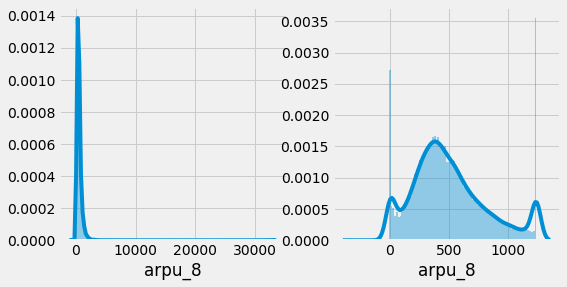

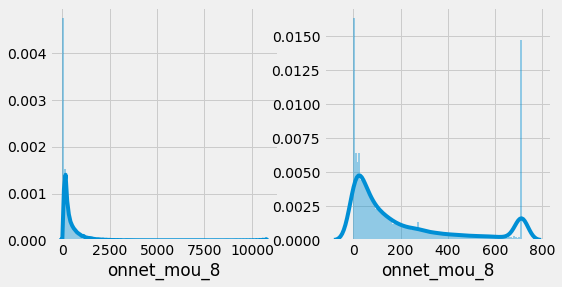

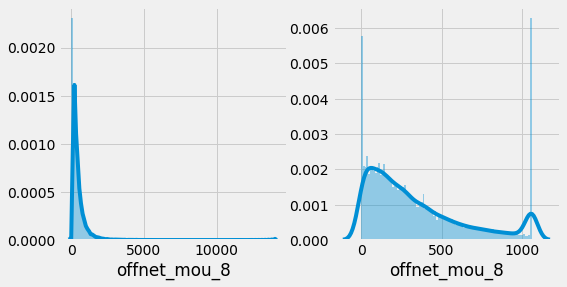

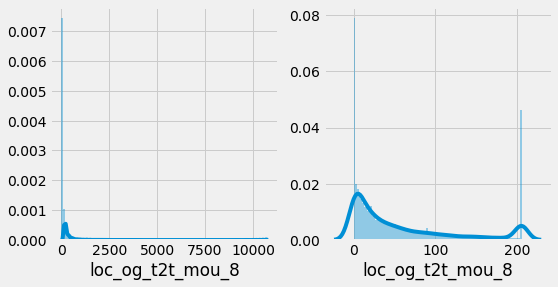

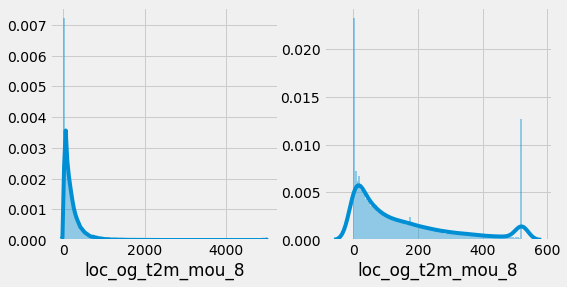

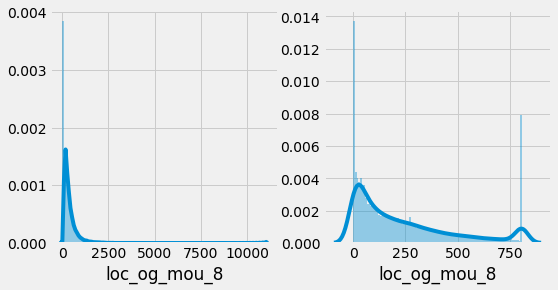

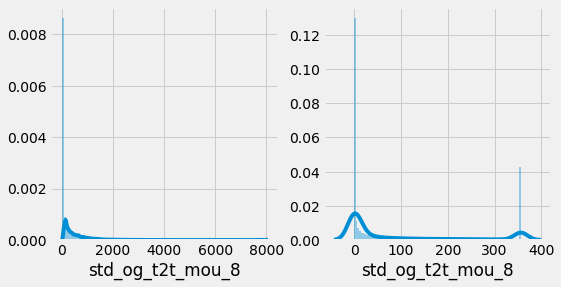

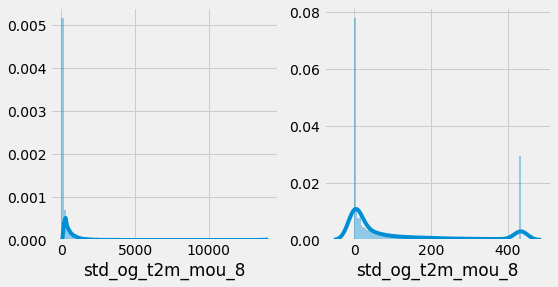

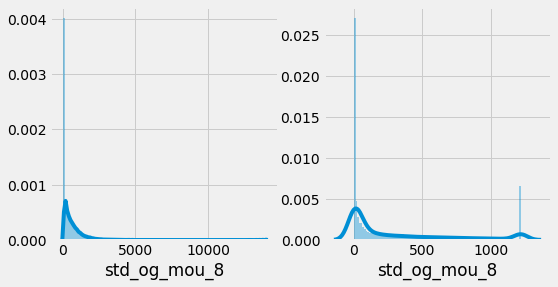

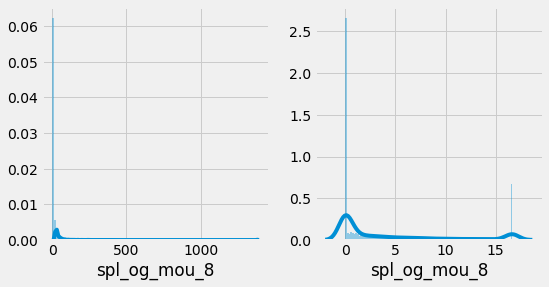

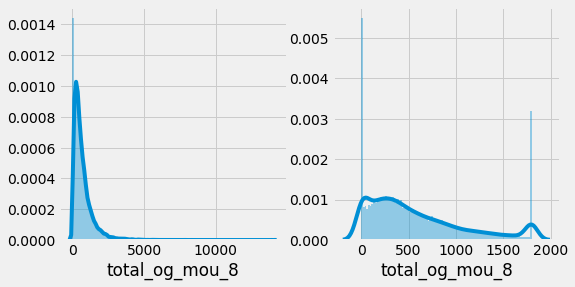

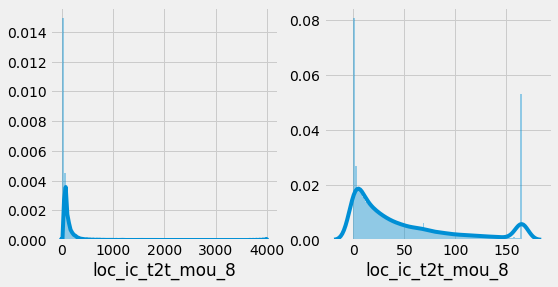

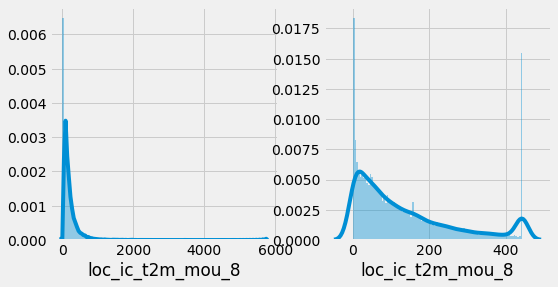

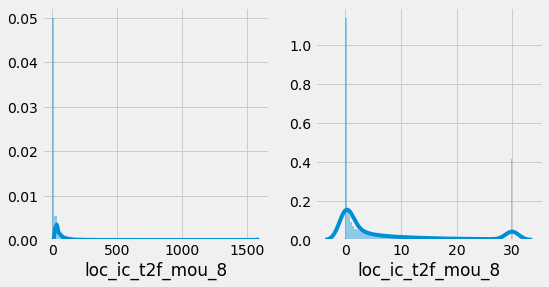

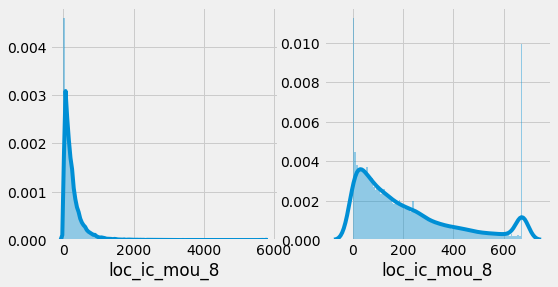

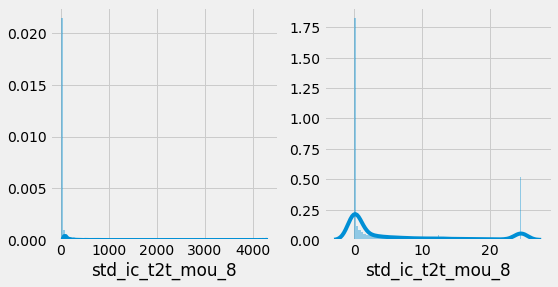

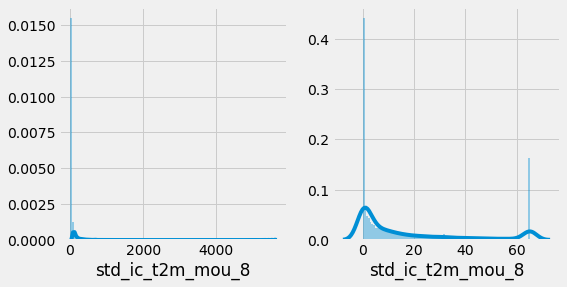

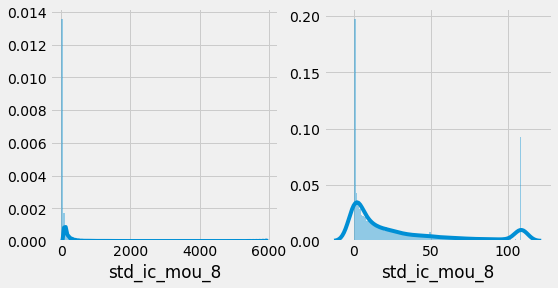

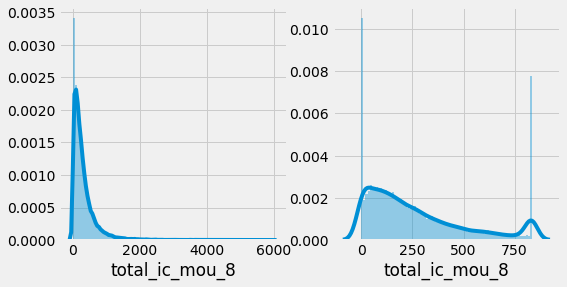

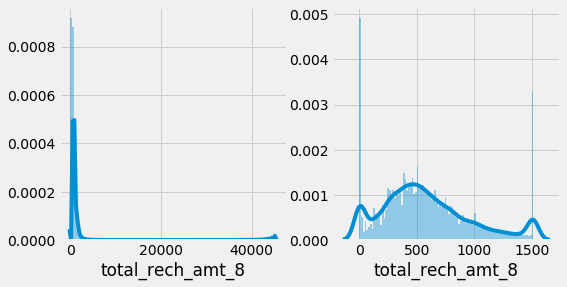

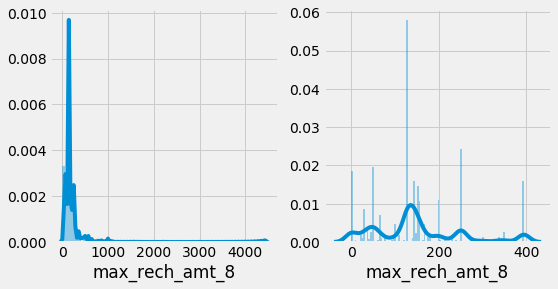

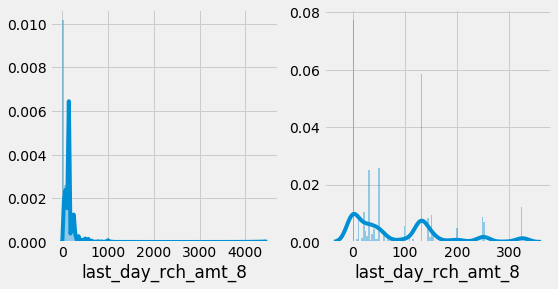

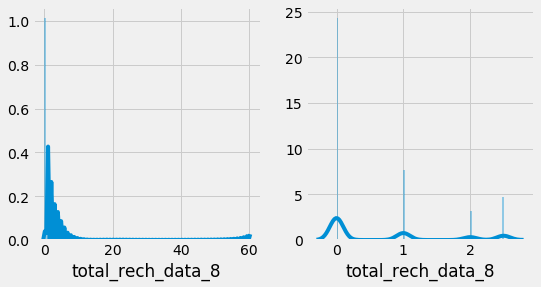

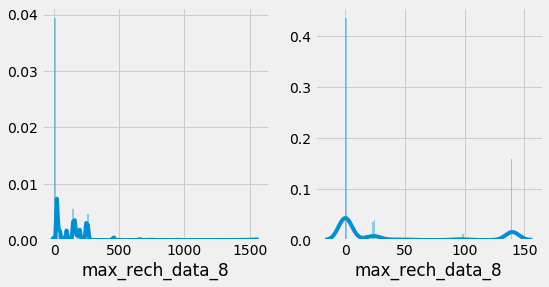

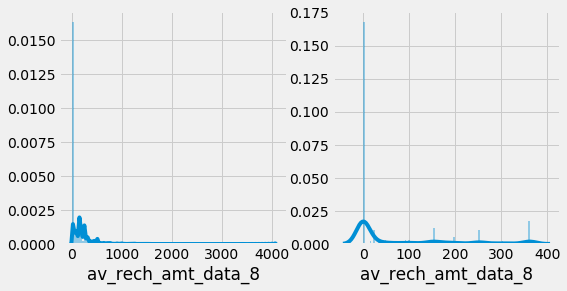

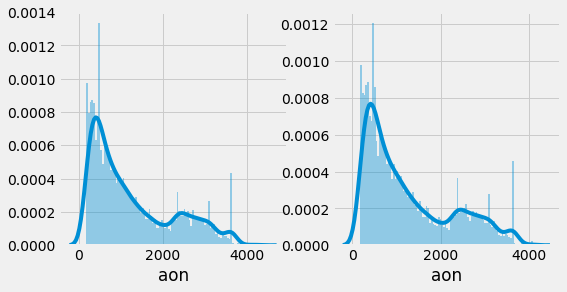

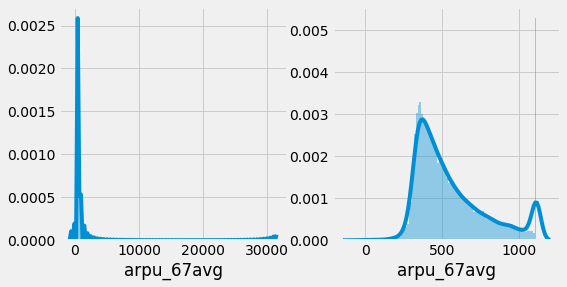

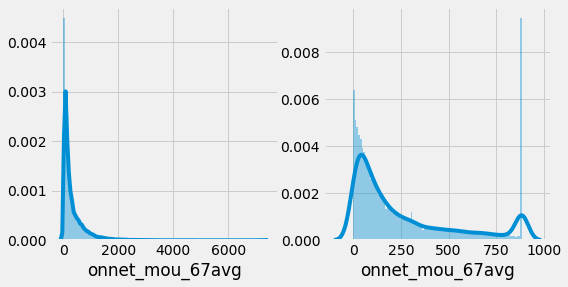

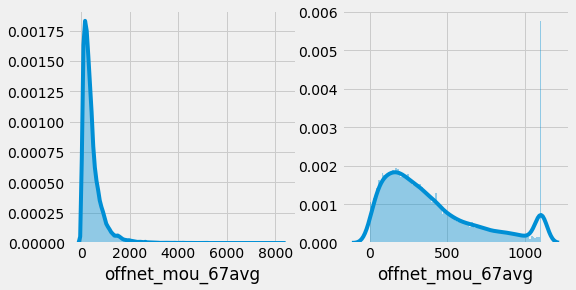

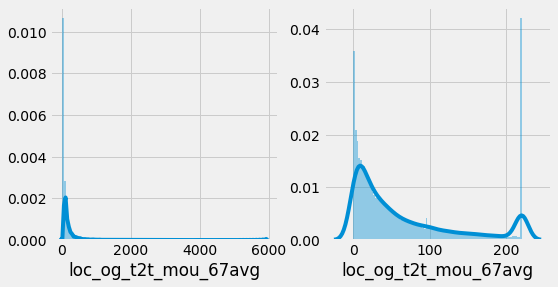

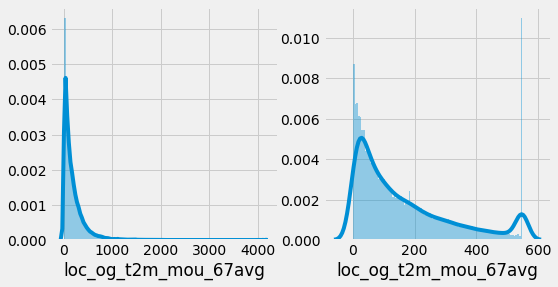

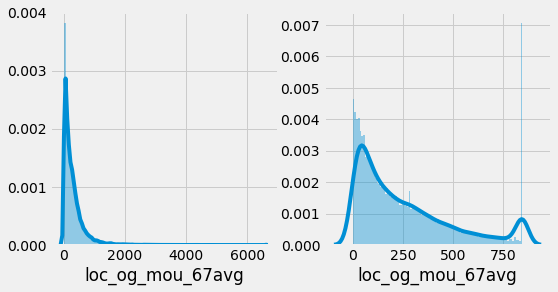

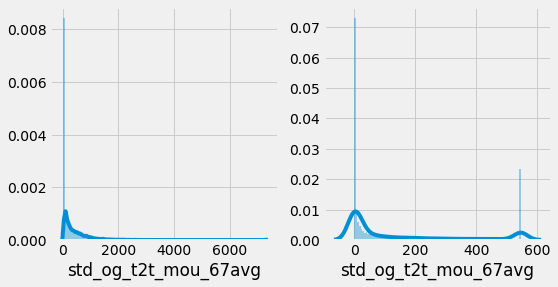

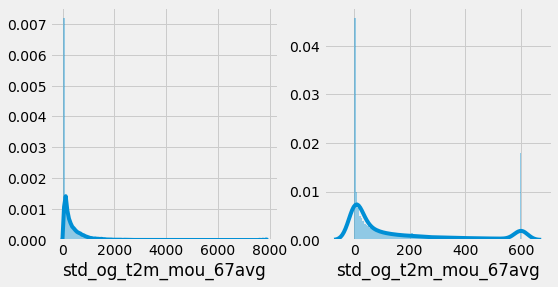

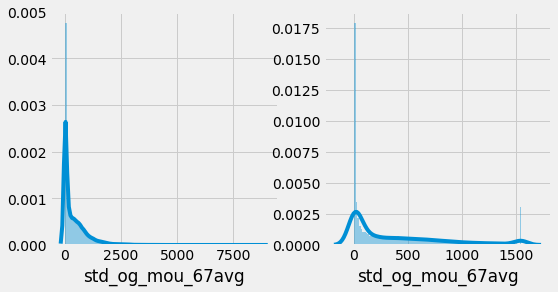

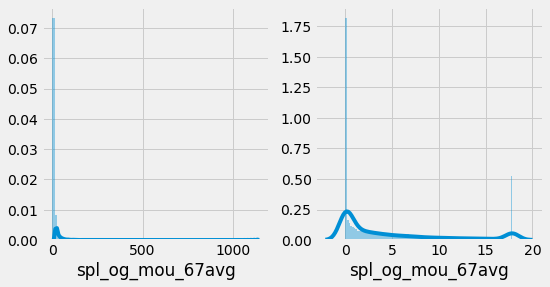

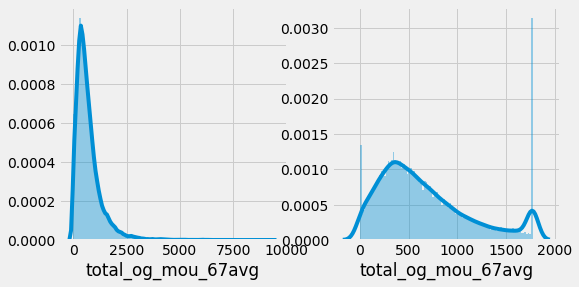

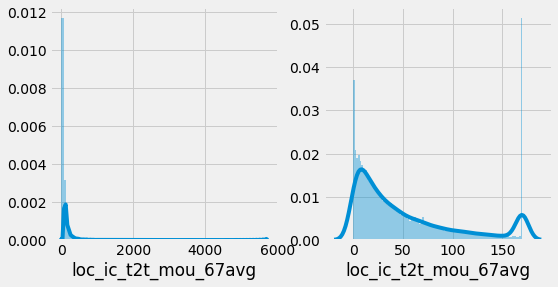

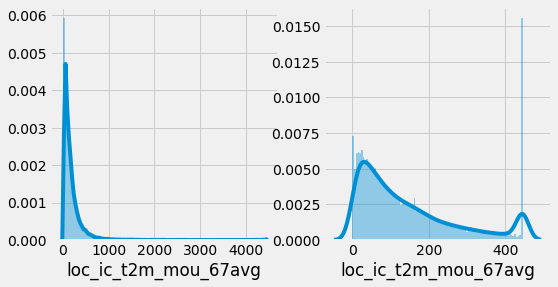

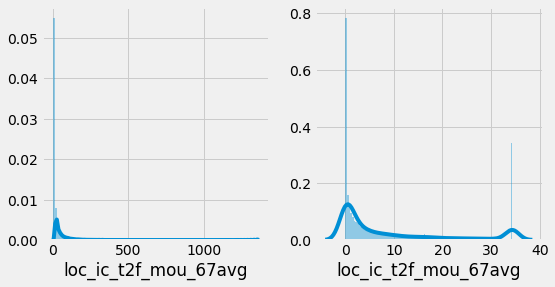

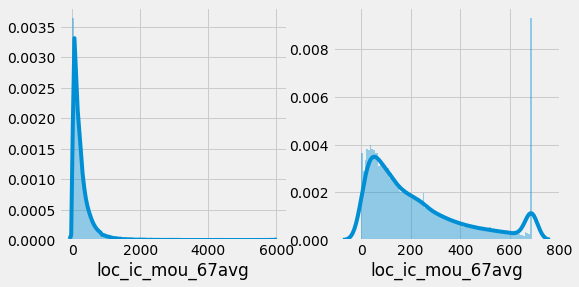

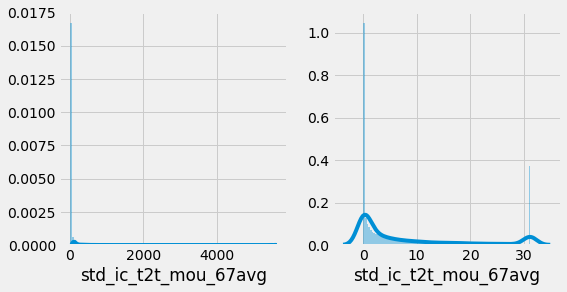

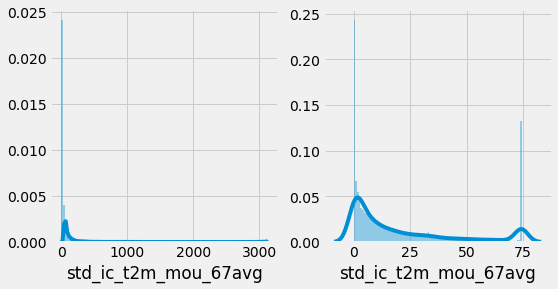

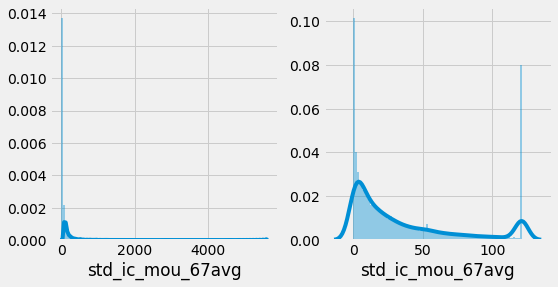

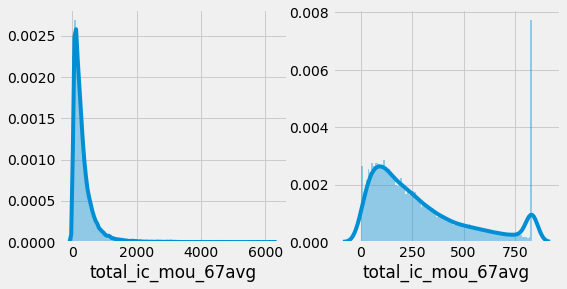

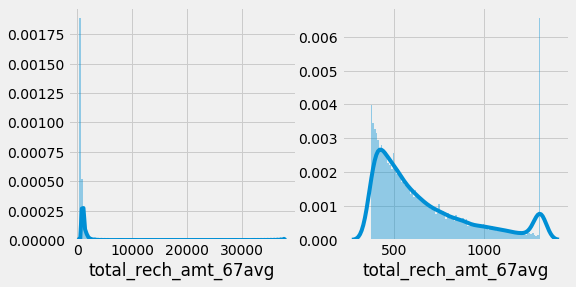

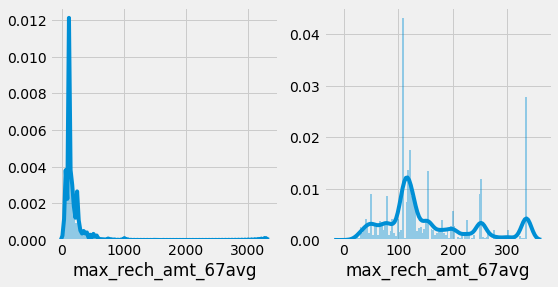

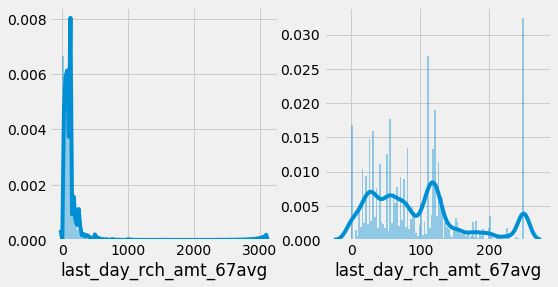

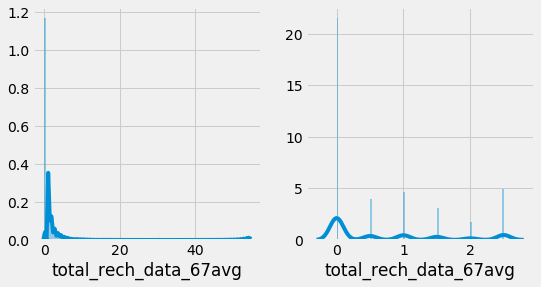

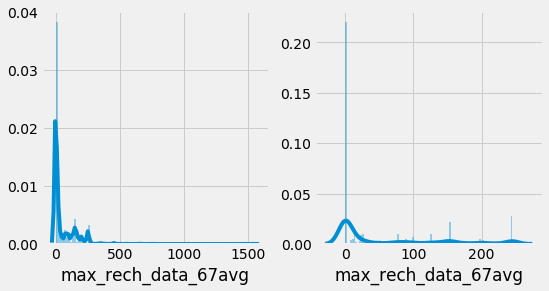

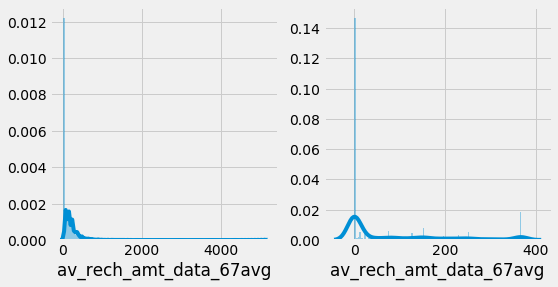

In [44]:
for i in col_outlier:
    outlier(i)

NOTE: we have some revenue as (-) but that could be creidts so we will leave that 

In [45]:
telecom[telecom.arpu_8<0]

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_8,aon,vbc_3g_8,Churn,arpu_67avg,onnet_mou_67avg,offnet_mou_67avg,roam_ic_mou_67avg,roam_og_mou_67avg,loc_og_t2t_mou_67avg,loc_og_t2m_mou_67avg,loc_og_t2f_mou_67avg,loc_og_t2c_mou_67avg,loc_og_mou_67avg,std_og_t2t_mou_67avg,std_og_t2m_mou_67avg,std_og_t2f_mou_67avg,std_og_mou_67avg,isd_og_mou_67avg,spl_og_mou_67avg,total_og_mou_67avg,loc_ic_t2t_mou_67avg,loc_ic_t2m_mou_67avg,loc_ic_t2f_mou_67avg,loc_ic_mou_67avg,std_ic_t2t_mou_67avg,std_ic_t2m_mou_67avg,std_ic_t2f_mou_67avg,std_ic_mou_67avg,total_ic_mou_67avg,spl_ic_mou_67avg,isd_ic_mou_67avg,ic_others_67avg,total_rech_num_67avg,total_rech_amt_67avg,max_rech_amt_67avg,last_day_rch_amt_67avg,total_rech_data_67avg,max_rech_data_67avg,count_rech_2g_67avg,count_rech_3g_67avg,av_rech_amt_data_67avg,vol_2g_mb_67avg,vol_3g_mb_67avg,arpu_3g_67avg,arpu_2g_67avg,monthly_2g_67avg,sachet_2g_67avg,monthly_3g_67avg,sachet_3g_67avg,fb_user_67avg,vbc_3g_67avg
2750,-5.0000,23.0060,37.6520,5.3220,0.3220,22.0000,19.2320,1.3520,3.2880,42.5900,1.0060,13.4520,0.0000,14.4580,0.0000,3.6280,0.0000,1.8960,16.0060,0.0000,17.9040,0.0000,1.3020,0.0000,1.3020,0.0000,0.0000,0.0000,0.0000,1,0.0000,0.0000,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0,0,0,0.0000,2988.0000,0.0000,1,521.5455,32.7250,245.3150,0.0000,0.0000,26.6250,157.3100,83.8850,0.0000,267.8350,6.0950,3.0150,0.0900,9.2000,1.0000,1.5800,281.3600,14.6300,81.7700,1.1300,97.5350,0.7350,0.0000,0.6950,1.4350,98.9750,0.0000,0.0000,0.0000,15.5000,565.0000,80.0000,15.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,16.1150
2777,-282.5693,713.5275,1059.8950,0.0000,0.0000,205.9800,521.3550,5.7400,9.7600,806.8600,356.4250,434.6600,9.7100,1220.5050,0.0000,10.0900,1800.1400,11.5100,48.2800,0.0000,59.7900,3.2400,5.3900,0.0000,8.6400,68.6100,0.0000,0.0000,0.1600,3,1511.5000,394.5000,325,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0,0,0,0.0000,1038.0000,0.0000,0,965.7410,884.4525,1103.3708,0.0000,0.0000,220.8500,549.6213,9.0100,2.8200,844.0400,546.3375,601.9200,7.5200,1549.5100,0.0000,3.8100,1773.7887,6.1950,42.1600,0.0000,48.3600,3.8600,12.3250,0.0000,16.1950,64.5800,0.0000,0.0000,0.0150,1.5000,1315.0000,335.0000,250.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4658,-5.0000,0.0000,4.3700,0.0000,0.0000,0.0000,0.0000,0.0000,4.3700,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.6160,0.0000,0.0000,0.1100,0.0000,0.1100,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1,0.0000,0.0000,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0,0,0,0.0000,765.0000,0.0000,1,385.2960,309.6000,38.3400,0.0000,0.0000,25.5600,35.6550,0.0000,0.0000,61.2200,284.0350,2.5650,0.0000,286.6000,0.1150,1.2050,350.7350,27.5850,7.7800,0.0000,35.3650,12.0850,0.9900,0.0000,13.0750,48.5000,0.0250,0.0000,0.0250,23.5000,440.0000,30.0000,10.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6914,-10.0000,0.0000,0.8500,1.9000,3.7100,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2,0.0000,0.0000,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0,0,0,0.0000,

### Creating New feature as a fraction of month 8 and avg of 6 & 7 

- Below we create a feature to track change between 67avg and 8 month. we are not using (67avg-8)/8 becaause 8 has a lot of 0 values. 

In [46]:
for i in month_var:
    telecom[i+"change"] = telecom[i+'8']-(telecom[i+'67avg'])

In [47]:
telecom.shape

(29979, 146)

## 1.6 Data Visualisation and EDA

In [48]:
def Visual(col1, col2, col3):
    fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(20, 4))
    ax = sns.distplot(telecom[telecom['Churn']==1][col1], bins = 40, ax = axes[0])
    ax.set_title('Churn',fontweight='bold',size=20)
    ax = sns.distplot(telecom[telecom['Churn']==0][col1], bins = 40, ax = axes[1])
    ax.set_title('Non-Churn',fontweight='bold',size=20)
    ax = sns.distplot(telecom[telecom['Churn']==1][col2], bins = 40, ax = axes[2])
    ax.set_title('Churn',fontweight='bold',size=20)
    ax = sns.distplot(telecom[telecom['Churn']==0][col2], bins = 40, ax = axes[3])
    ax.set_title('Non-Churn',fontweight='bold',size=20)
    fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20, 4))
    ax = sns.boxplot(x="Churn", y=col1, data=telecom, ax=axes[0])
    ax.set_title(col1,fontweight='bold',size=20)
    ax = sns.boxplot(x="Churn", y=col2, data=telecom, ax=axes[1])
    ax.set_title(col2,fontweight='bold',size=20)
    ax = sns.boxplot(x="Churn", y=col3, data=telecom, ax=axes[2])
    ax.set_title(col3,fontweight='bold',size=20)
    

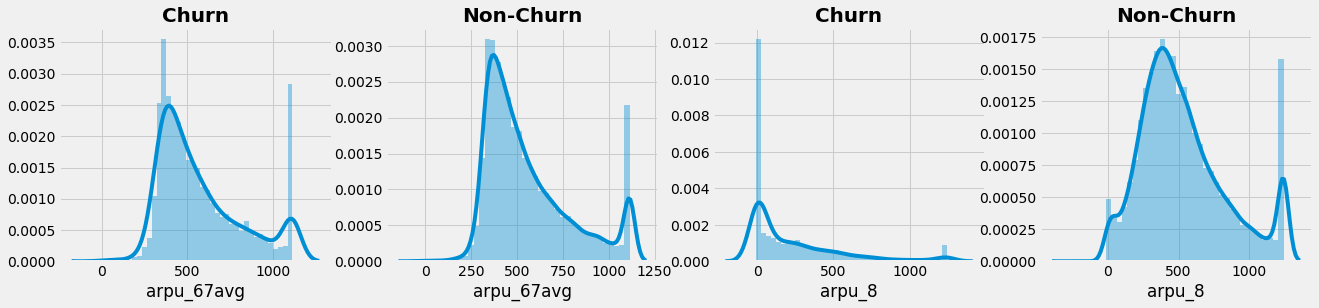

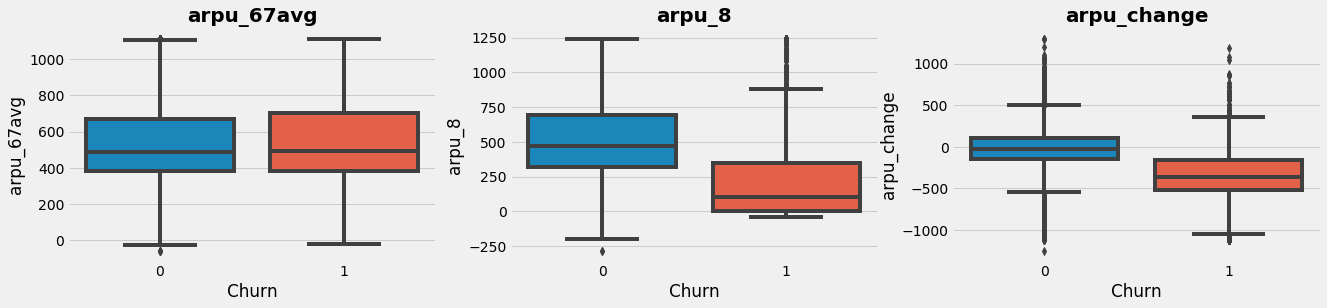

In [49]:
Visual('arpu_67avg','arpu_8','arpu_change')

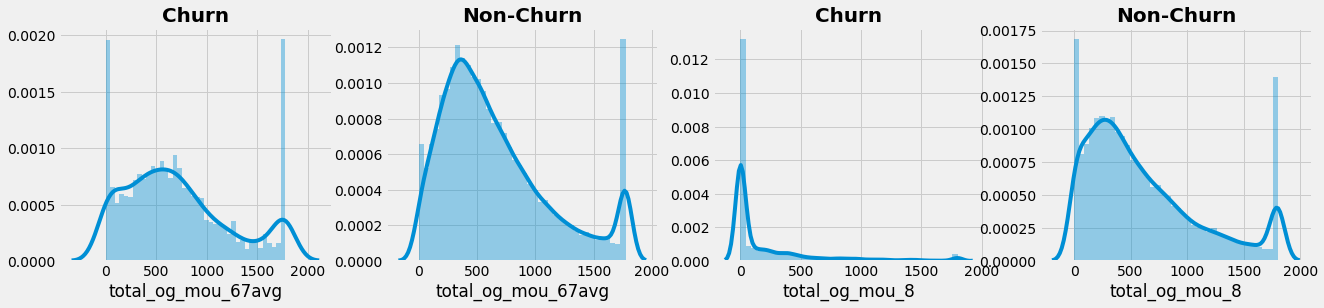

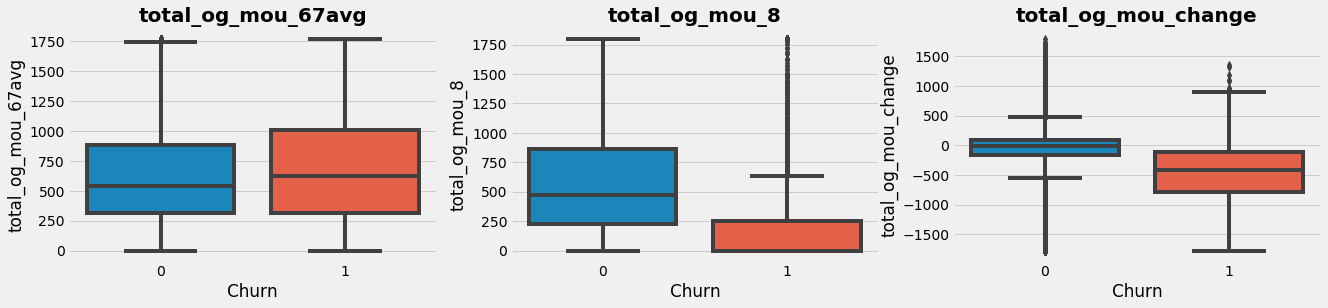

In [50]:
Visual('total_og_mou_67avg','total_og_mou_8','total_og_mou_change')

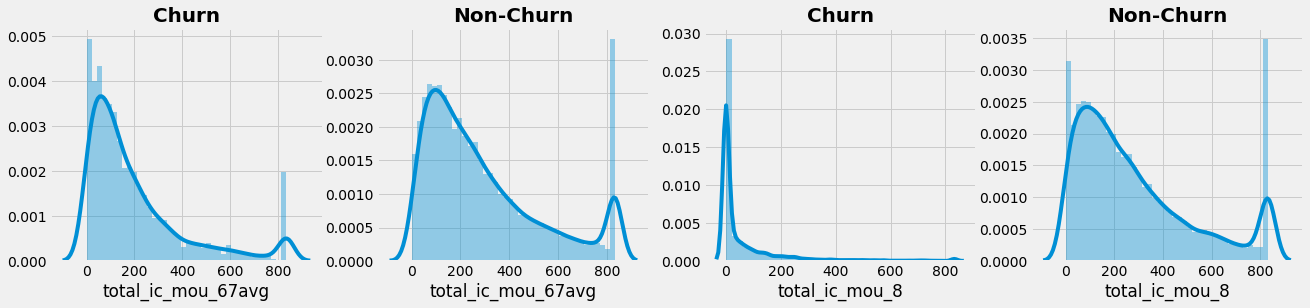

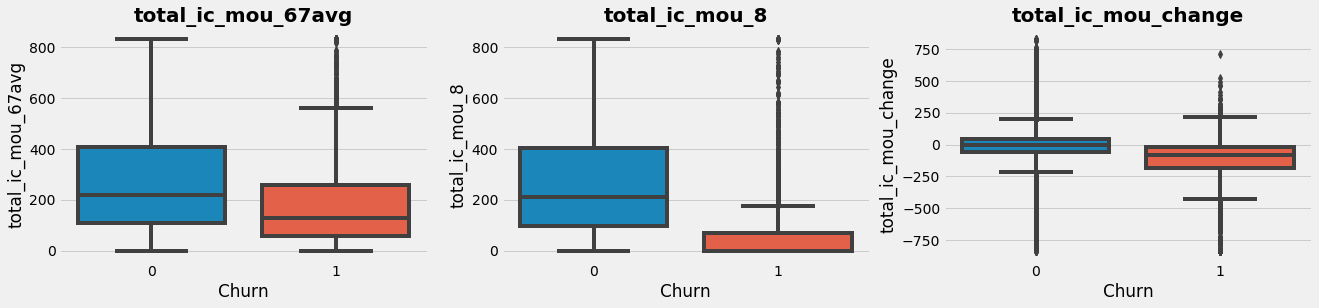

In [51]:
Visual( 'total_ic_mou_67avg','total_ic_mou_8','total_ic_mou_change')

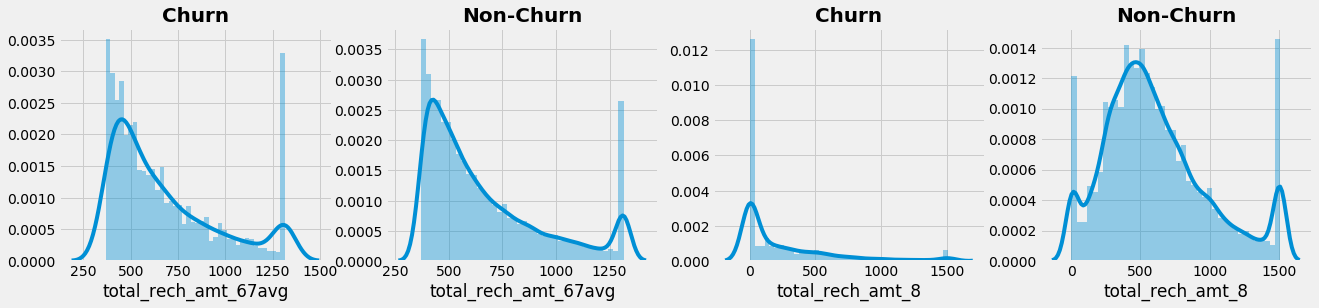

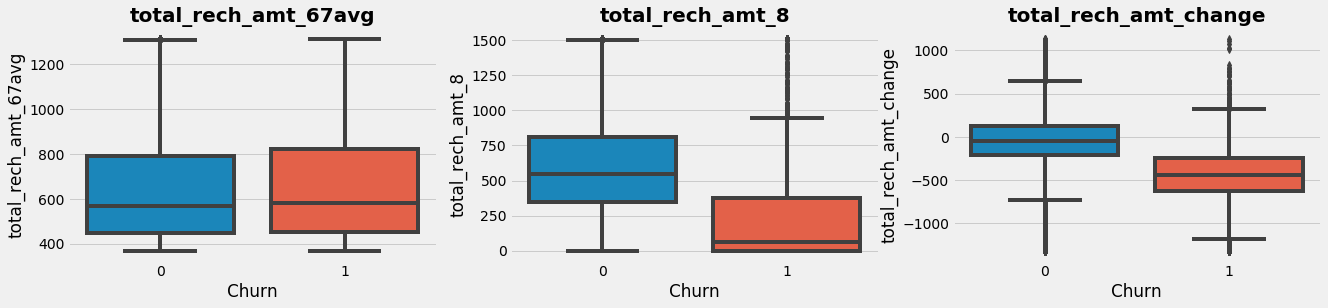

In [52]:
Visual( 'total_rech_amt_67avg','total_rech_amt_8','total_rech_amt_change')

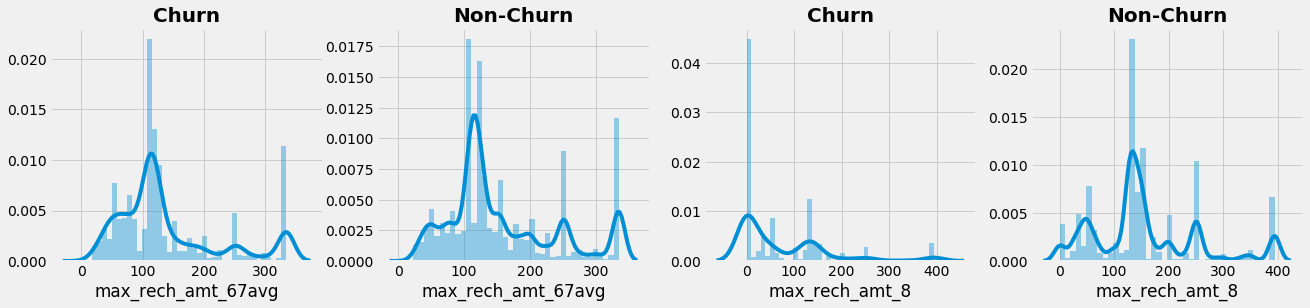

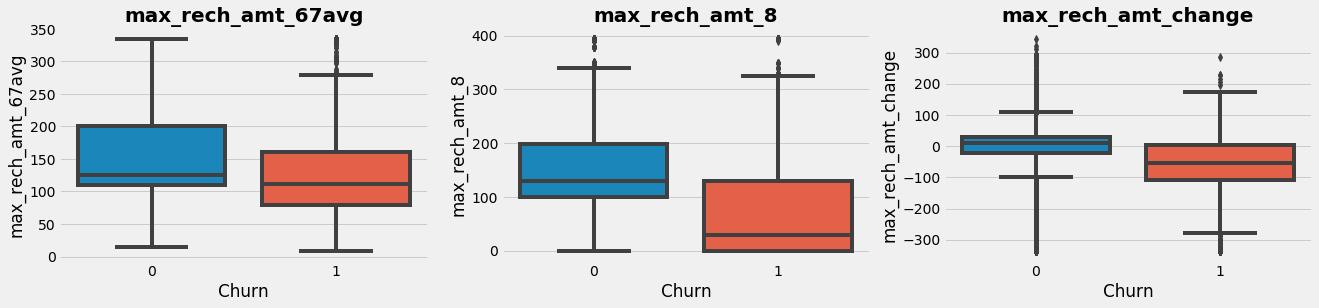

In [53]:
Visual('max_rech_amt_67avg','max_rech_amt_8','max_rech_amt_change')

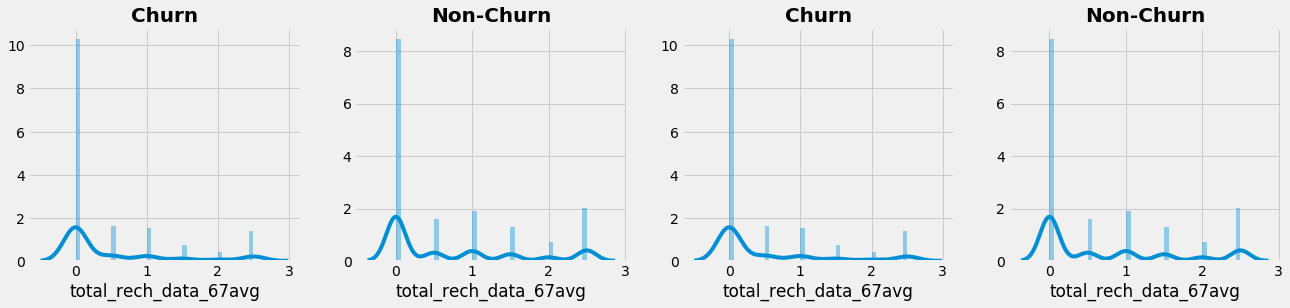

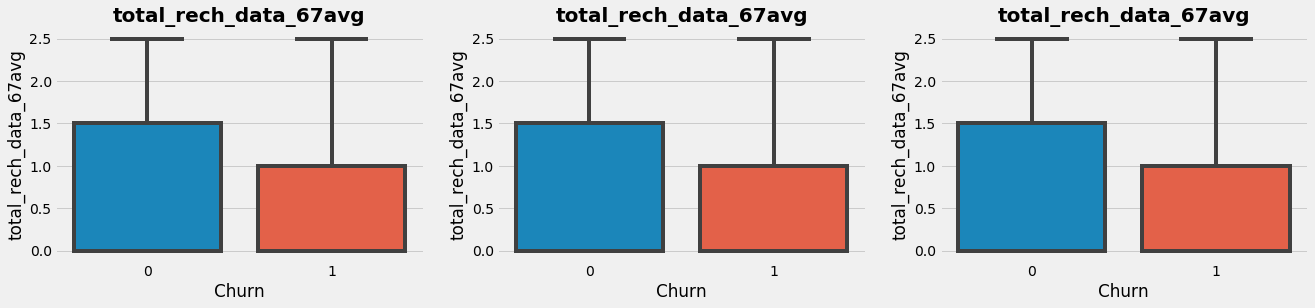

In [54]:
Visual( 'total_rech_data_67avg', 'total_rech_data_67avg', 'total_rech_data_67avg')

Text(0.5, 1.0, 'Aon')

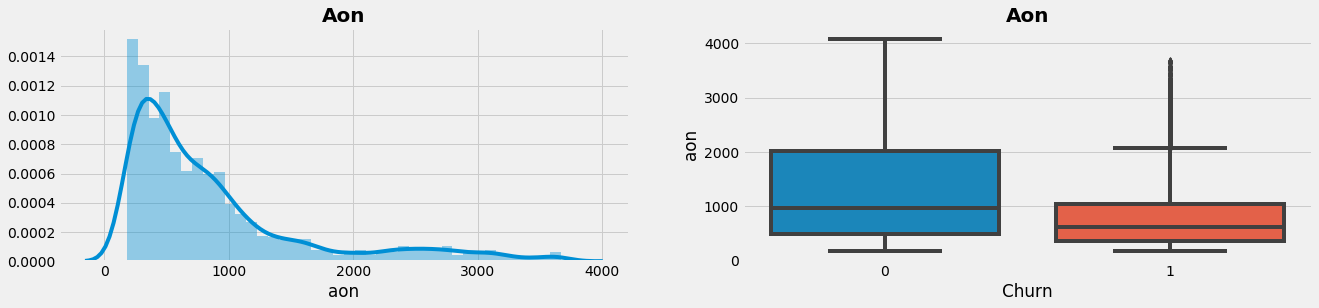

In [55]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20, 4))
ax = sns.distplot(telecom[telecom['Churn']==1]['aon'], bins = 40, ax = axes[0])
ax.set_title('Aon',fontweight='bold',size=20)
ax = sns.boxplot(x="Churn", y='aon', data=telecom, ax=axes[1])
ax.set_title('Aon',fontweight='bold',size=20)

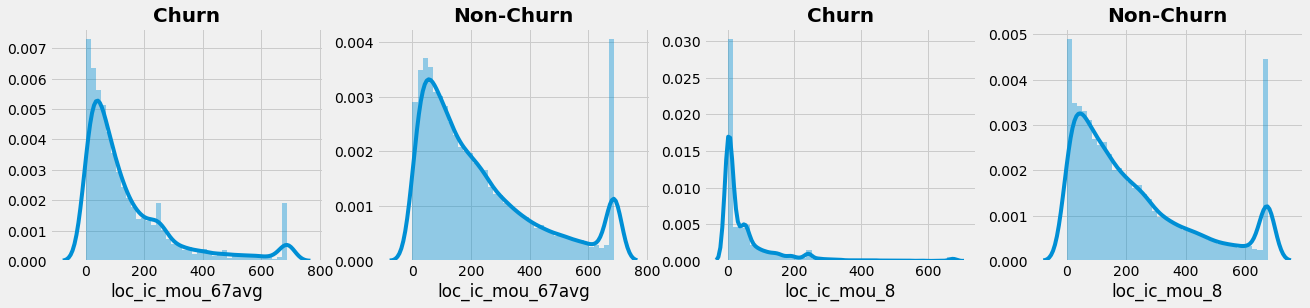

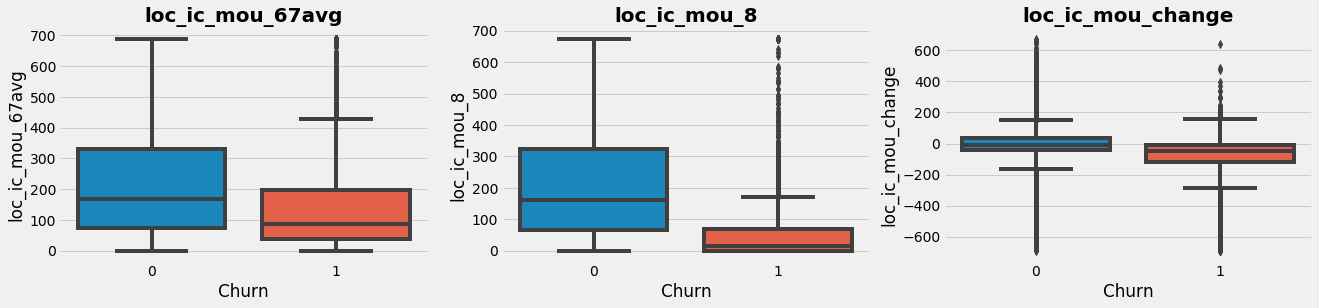

In [56]:
Visual('loc_ic_mou_67avg','loc_ic_mou_8','loc_ic_mou_change')

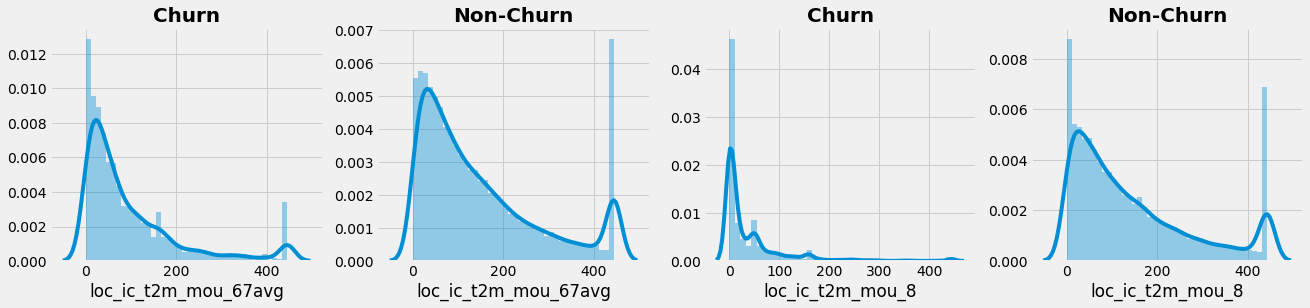

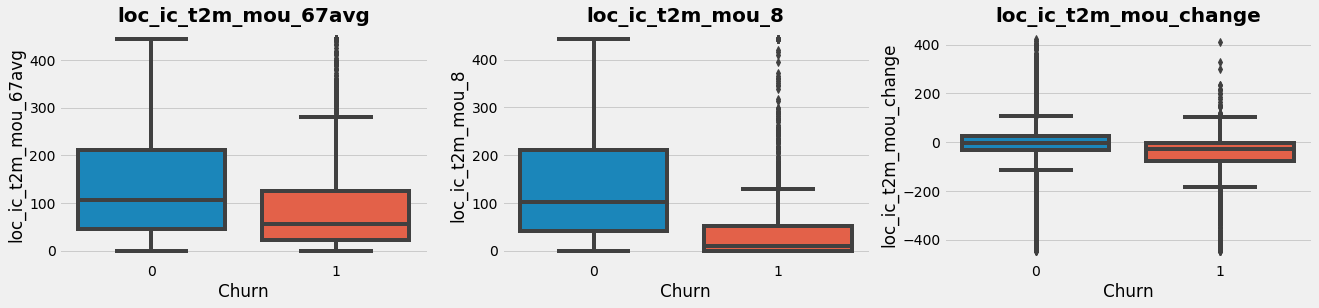

In [57]:
Visual('loc_ic_t2m_mou_67avg','loc_ic_t2m_mou_8','loc_ic_t2m_mou_change')

In [58]:
telecom.shape

(29979, 146)

In [59]:
def Visual_1(col1, col2, col3):
    fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20, 4))
    telecom.groupby(['Churn'])[col1].mean().plot.bar(ax=axes[0])
    ax.set_title('Churn',fontweight='bold',size=20)
    telecom.groupby(['Churn'])[col2].mean().plot.bar(ax=axes[1])
    ax.set_title('Non-Churn',fontweight='bold',size=20)
    telecom.groupby(['Churn'])[col3].mean().plot.bar(ax=axes[2])
    ax.set_title('Non-Churn',fontweight='bold',size=20)


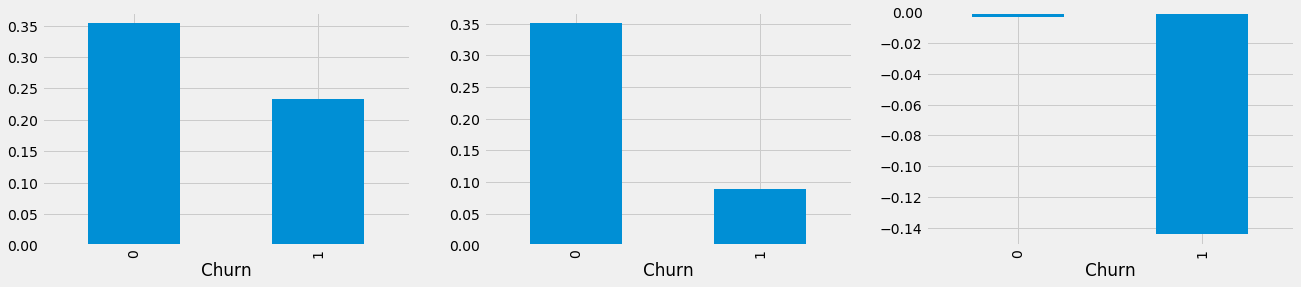

In [60]:
Visual_1('fb_user_67avg', 'fb_user_8', 'fb_user_change')

In [61]:
#Visual_1('night_pck_user_67avg','night_pck_user_8','night_pck_user_change')

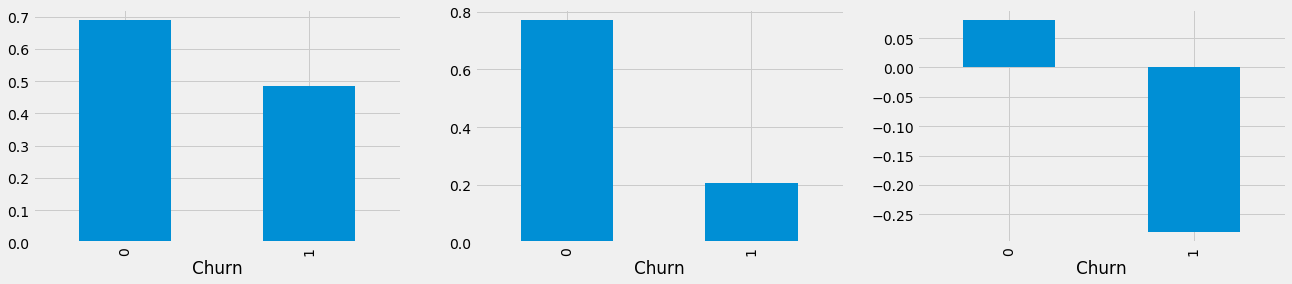

In [62]:
Visual_1('count_rech_2g_67avg', 'count_rech_2g_8', 'count_rech_2g_change')

In [63]:
# Creating more freatures

In [64]:
for i in ['67avg','8']:
    telecom['tot_og_to_ic_mou_'+i] = (telecom['total_og_mou_'+i])/(telecom['total_ic_mou_'+i]+1)

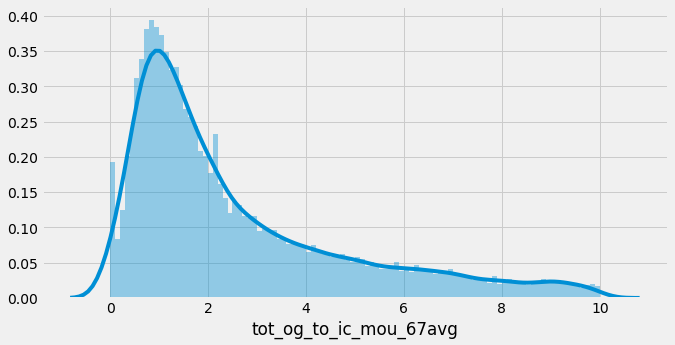

In [65]:
plt.figure(figsize=[10,5])
sns.distplot(telecom.tot_og_to_ic_mou_67avg[telecom.tot_og_to_ic_mou_67avg<10], bins=100 )
#telecom.tot_og_to_ic_mou_67avg.plot.hist(bins=100, range=[0,10])
plt.show()

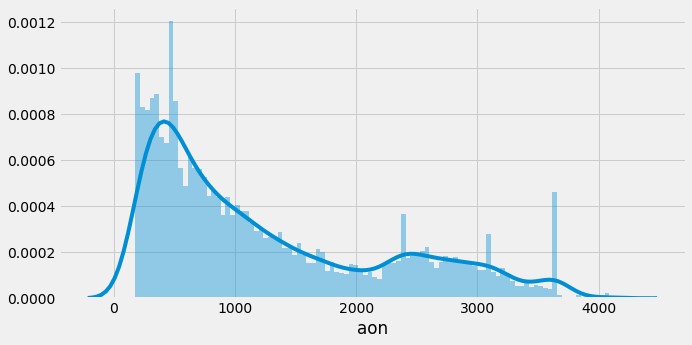

In [66]:
plt.figure(figsize=[10,5])
#telecom.aon.plot.hist(bins=100,)
sns.distplot(telecom.aon, bins=100 )
plt.show()

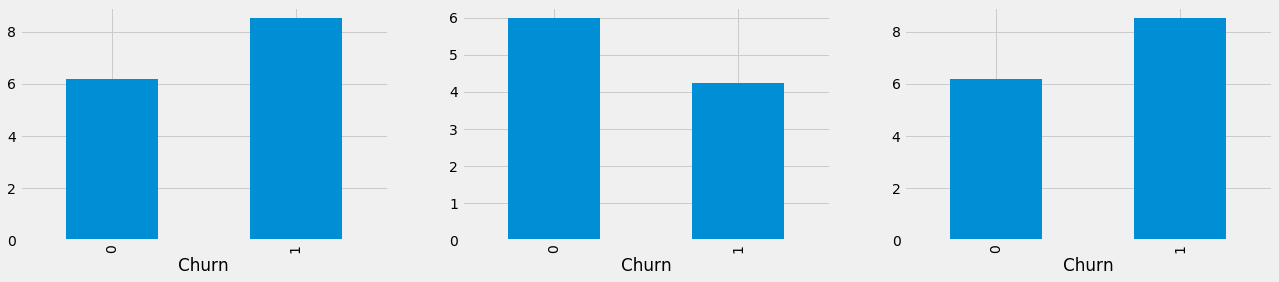

In [67]:
Visual_1('tot_og_to_ic_mou_67avg', 'tot_og_to_ic_mou_8','tot_og_to_ic_mou_67avg')

In [68]:
for i in ['67avg','8']:
    telecom['total_vol_'+i] = (telecom['vol_2g_mb_'+i])+(telecom['vol_3g_mb_'+i])

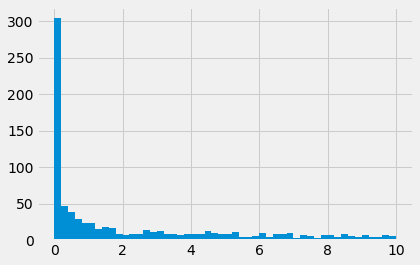

In [69]:
telecom.total_vol_67avg.hist(bins=50, range=[0.001,10])
plt.show()

In [70]:
telecom.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Data columns (total 150 columns):
 #    Column                   Dtype  
---   ------                   -----  
 0    arpu_8                   float64
 1    onnet_mou_8              float64
 2    offnet_mou_8             float64
 3    roam_ic_mou_8            float64
 4    roam_og_mou_8            float64
 5    loc_og_t2t_mou_8         float64
 6    loc_og_t2m_mou_8         float64
 7    loc_og_t2f_mou_8         float64
 8    loc_og_t2c_mou_8         float64
 9    loc_og_mou_8             float64
 10   std_og_t2t_mou_8         float64
 11   std_og_t2m_mou_8         float64
 12   std_og_t2f_mou_8         float64
 13   std_og_mou_8             float64
 14   isd_og_mou_8             float64
 15   spl_og_mou_8             float64
 16   total_og_mou_8           float64
 17   loc_ic_t2t_mou_8         float64
 18   loc_ic_t2m_mou_8         float64
 19   loc_ic_t2f_mou_8         float64
 20   loc_ic_mou_8             f

## Obesrvations from EDA 

- Average Revenue for Churned Customers is less for month 8 as compared to Unchurned users
- Total outgoing for churned users is less for month 8 as compared to unchurned users. 
- Total incoming for churned users is less for month 8 as compared to unchurned users.
- Total recharge amount for churned users is less for month 8 as compared to unchurned users.
- Max recharge amount for churned users is less for month 8 as compared to unchurned users.
- Total recharge amount for churned users is less for month 8 as compared to unchurned users.
- Newer customers ( based on AON) tend to churn as compared to older customers 
- Local incoming from within the network and outside network for churned users is less for month 8 as compared to unchurned users.
- Significant drop in FB usage in month 8 for Churned customers and no change for Unchurned customers. 


# Modelling

## 1.0 Data Preparation for Modelling 

In [71]:
X=telecom.drop('Churn',axis=1)
y=telecom['Churn']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
X_train.shape, X_test.shape, y_train.shape

((23983, 149), (5996, 149), (23983,))

### 1.0.1 Handling imbalance

- We will first look at imbalance 

In [74]:
telecom.Churn.value_counts(1)

0   0.9136
1   0.0864
Name: Churn, dtype: float64

- only 8.6% of values are 1. this is a high imbance and we will use SMOTE to rectify it 

In [75]:
#from imblearn.over_sampling import SMOTE
#smt = SMOTE()
#X_train,y_train = smt.fit_sample(X_train,y_train)

### NOTE: SMOTE does not work with current version. As an alternate, class imbalance has been handled for Logistic Regression during model fit


<i> ERROR: Could not run SMOTE as The newest version 0.7.0 of imbalanced-learn seems to have an undocumented dependency on scikit-learn v0.23.1. It would give you AttributeError: 'SMOTE' object has no attribute '_validate_data' if your scikit-learnis 0.22 or below.

Note from Stackoverflow
If you are using Anaconda, installing scikit-learn version 0.23.1 might be tricky. conda update scikit-learn might not update scikit-learn version 0.23 or higher because the newest scikit-learn version Conda has at this point of time is 0.22.1. If you try to install it using conda install scikit-learn=0.23.1 or pip install scikit-learn==0.23.1, you will get tons of compatibility checks and installation might not be quick. Therefore the easiest way to install scikit-learn version 0.23.1 in Anaconda is to create a new virtual environment with minimum packages so that there are less or no conflict issues. Then, in the new virtual environment install scikit-learn version 0.23.1 followed by version 0.7.0 of imbalanced-learn. </i>

In [76]:
X_train.columns

Index(['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8',
       ...
       'monthly_2g_change', 'sachet_2g_change', 'monthly_3g_change',
       'sachet_3g_change', 'fb_user_change', 'vbc_3g_change',
       'tot_og_to_ic_mou_67avg', 'tot_og_to_ic_mou_8', 'total_vol_67avg',
       'total_vol_8'],
      dtype='object', length=149)

In [77]:
# scaling using StandardScaler scaler
scaler=StandardScaler()
X_train[X_train.columns]=scaler.fit_transform(X_train[X_train.columns])
X_test[X_train.columns]=scaler.transform(X_test[X_train.columns])
X[X_train.columns]=scaler.fit_transform(X[X_train.columns])

In [78]:
X_train.shape

(23983, 149)

### 1.0.2  Principle Component Analysis ( PCA)

- We carry out PCA first to eliminate extra features and converge the feature group to discribe 95% of the information

In [79]:
# We are going with PCA 0.95 for  95% information


pca=PCA(0.95)
df_train=pca.fit_transform(X_train)
df_train.shape

(23983, 59)

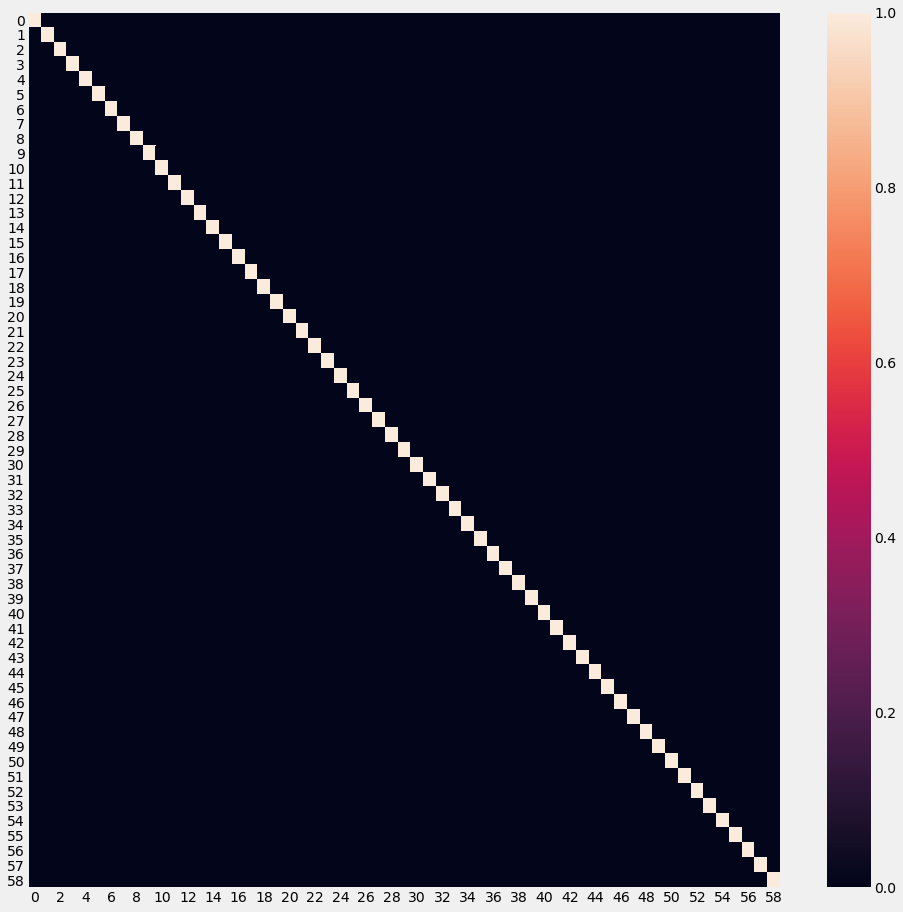

In [80]:
# checking for coorelation 
plt.figure(figsize=(15,15))
sns.heatmap(pd.DataFrame(df_train).corr())
plt.show()

In [81]:
# running now with feactures 
pca=PCA(n_components=59,random_state=42,svd_solver='randomized')
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)

## 2.0 Logitic Regression Model with PCA



Since we are not able to run SMOTE, we will use the class_weight parameter for Logistic Regression to balance y.

In [82]:
lr_pca = LogisticRegression(random_state=42, class_weight='balanced')
lr_pca.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
y_train_pred = lr_pca.predict(X_train_pca)
y_train_prob = lr_pca.predict_proba(X_train_pca)[:,1]
y_test_pred = lr_pca.predict(X_test_pca)
y_test_prob = lr_pca.predict_proba(X_test_pca)[:,1]

In [84]:
#Function to plto metrix
def metrics_model(actual, predicted, method):
    confusion = confusion_matrix(actual, predicted)
    TP=confusion[1,1] #True positives
    TN= confusion[0,0] #True Negatives
    FP=confusion[0,1] #False Positives
    FN= confusion[1,0] #False Negatives
    acc_score = round(accuracy_score(actual, predicted),2) #accuracy score
    rcl_score=round(recall_score(actual, predicted),2) #recall score
    fpr = round(FP/float(TN+FP),2) #False Positive Ration
    specificity = round(TN/float(TN+FP),2) #False Positive Ration
    sensitivity = round(TP/float(TP+FN),2)
    precision = round(TP/float(TP+FP),2)
    metrics_df = pd.DataFrame(data=[[acc_score,sensitivity, specificity,fpr,precision,TP,TN,FP,FN,]],columns=['Accuracy','Sens(Rcll/TPR)','Specificity','FPR','Precision','true_positive','true_negative', 'false_positive','false_negative'],index=[method])
    return metrics_df

In [85]:
main_metric=metrics_model(y_test, y_test_pred, "LR with PCA Coff=0.5")
main_metric

,Accuracy,Sens(Rcll/TPR),Specificity,FPR,Precision,true_positive,true_negative,false_positive,false_negative
LR with PCA Coff=0.5,0.8300,0.8000,0.8400,0.1600,0.3100,412,4583,897,104


## 2.1 Logistic Regression Model (Cutoff tuned for threshhold)

- With parameter tuning

In [86]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_pred':y_train_pred, 'Churn_prob':y_train_prob})
y_train_pred_final['S No'] = y_train.index
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_pred':y_test_pred, 'Churn_prob':y_test_prob})
y_test_pred_final['S No'] = y_test.index

In [87]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_pred,Churn_prob,S No,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0,0.3068,62446,1,1,1,1,0,0,0,0,0,0
1,0,1,0.6345,28589,1,1,1,1,1,1,1,0,0,0
2,0,0,0.0657,77944,1,0,0,0,0,0,0,0,0,0
3,0,0,0.0332,34583,1,0,0,0,0,0,0,0,0,0
4,0,1,0.6169,97270,1,1,1,1,1,1,1,0,0,0


In [88]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
def cal_params(df):    
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    from sklearn.metrics import confusion_matrix

    # TP = confusion[1,1] # true positive 
    # TN = confusion[0,0] # true negatives
    # FP = confusion[0,1] # false positives
    # FN = confusion[1,0] # false negatives

    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = confusion_matrix(df.Churn, df[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1

        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.show()

         prob  accuracy  sensi  speci
0.0000 0.0000    0.0864 1.0000 0.0000
0.1000 0.1000    0.4122 0.9764 0.3588
0.2000 0.2000    0.5730 0.9474 0.5376
0.3000 0.3000    0.6812 0.9151 0.6591
0.4000 0.4000    0.7641 0.8746 0.7537
0.5000 0.5000    0.8254 0.8191 0.8260
0.6000 0.6000    0.8682 0.7685 0.8776
0.7000 0.7000    0.8973 0.6918 0.9168
0.8000 0.8000    0.9168 0.5842 0.9483
0.9000 0.9000    0.9209 0.3054 0.9791


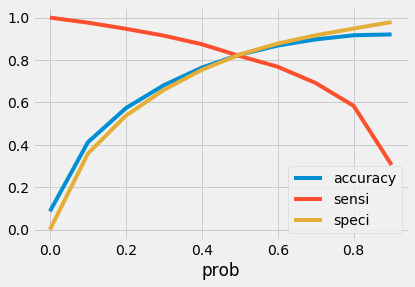

In [89]:
#Accuracy, Sensitivity, Specificity
cal_params(y_train_pred_final)

In [90]:
#precision , recall
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_prob)

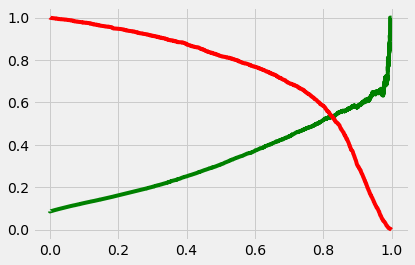

In [91]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [92]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

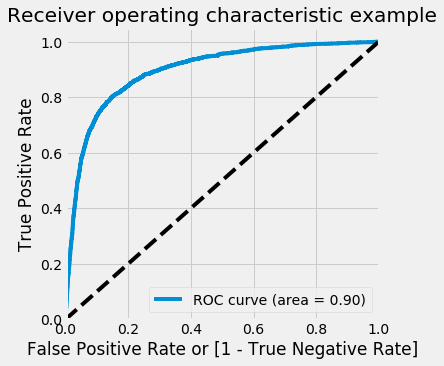

In [93]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_prob)

In [94]:
# Threshhold comes at same as default  at 0.5 from Accuracy, Sensitivity, Specificity curve 

y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_prob.map( lambda x: 1 if x > 0.5 else 0)
y_test_pred_final['final_predicted'] = y_test_pred_final.Churn_prob.map( lambda x: 1 if x > 0.5 else 0)


In [95]:
temp = metrics_model(y_test_pred_final['Churn'], y_test_pred_final['final_predicted'], "LR with PCA threshold optimised")

In [96]:
main_metric = pd.concat([main_metric, temp])

In [97]:
main_metric

,Accuracy,Sens(Rcll/TPR),Specificity,FPR,Precision,true_positive,true_negative,false_positive,false_negative
LR with PCA Coff=0.5,0.8300,0.8000,0.8400,0.1600,0.3100,412,4583,897,104
LR with PCA threshold optimised,0.8300,0.8000,0.8400,0.1600,0.3100,412,4583,897,104


In [98]:
# this is better since the Recall ( sensitivity ) is more which is important for identifying Churn vs non Churn 


## 2.2 Random Forest with PCA

In [99]:
rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train_pca,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [100]:
y_test_pred= rfc.predict(X_test_pca)
temp= metrics_model(y_test,y_test_pred, "Random Forest with PCA")

In [101]:
main_metric = pd.concat([main_metric, temp])

In [102]:
main_metric

,Accuracy,Sens(Rcll/TPR),Specificity,FPR,Precision,true_positive,true_negative,false_positive,false_negative
LR with PCA Coff=0.5,0.8300,0.8000,0.8400,0.1600,0.3100,412,4583,897,104
LR with PCA threshold optimised,0.8300,0.8000,0.8400,0.1600,0.3100,412,4583,897,104
Random Forest with PCA,0.9200,0.2700,0.9900,0.0100,0.6500,137,5405,75,379


## 2.3 Random Forest with PCA and Tuning of Hyper Params


In [103]:
rcf_h = RandomForestClassifier(random_state=42, n_jobs=-1)

In [104]:
params = {
    'max_depth': [10,20, 50],
    'min_samples_leaf': [2, 5, 10, 20],
    'n_estimators': [2, 5, 10]
}

In [105]:
grid_search = GridSearchCV(estimator=rcf_h,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="recall")

In [106]:
%%time
grid_search.fit(X_train_pca, y_train)

Fitting 4 folds for each of 36 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   40.6s finished


Wall time: 41.2 s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=42,
                                    

In [107]:
grid_search.best_score_

0.2797860825317473

In [108]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [109]:
best_params_rfpca = grid_search.best_estimator_

In [110]:
rfpca=RandomForestClassifier(random_state=42, n_estimators=50, criterion='gini',max_depth=20,
    min_samples_leaf=5, min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    max_features='auto')

In [111]:
rfpca.fit(X_train_pca,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [112]:
y_test_pred= rfpca.predict(X_test_pca)
temp= metrics_model(y_test,y_test_pred, "Random Forest with PCA Hypertuned")


In [113]:
main_metric = pd.concat([main_metric, temp])
main_metric

,Accuracy,Sens(Rcll/TPR),Specificity,FPR,Precision,true_positive,true_negative,false_positive,false_negative
LR with PCA Coff=0.5,0.8300,0.8000,0.8400,0.1600,0.3100,412,4583,897,104
LR with PCA threshold optimised,0.8300,0.8000,0.8400,0.1600,0.3100,412,4583,897,104
Random Forest with PCA,0.9200,0.2700,0.9900,0.0100,0.6500,137,5405,75,379
Random Forest with PCA Hypertuned,0.9200,0.2500,0.9900,0.0100,0.6400,130,5407,73,386


#### Note: Random Forest does not give a great output after searching through params 

## 2.4 SVM with PCA

In [114]:
svc= SVC(random_state=42,class_weight='balanced')
svc.fit(X_train_pca,y_train) #fitting model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [115]:
y_test_pred=svc.predict(X_test_pca) #model prediction

In [116]:
temp= metrics_model(y_test,y_test_pred, "SVM with PCA")

In [117]:
main_metric = pd.concat([main_metric, temp])
main_metric

,Accuracy,Sens(Rcll/TPR),Specificity,FPR,Precision,true_positive,true_negative,false_positive,false_negative
LR with PCA Coff=0.5,0.8300,0.8000,0.8400,0.1600,0.3100,412,4583,897,104
LR with PCA threshold optimised,0.8300,0.8000,0.8400,0.1600,0.3100,412,4583,897,104
Random Forest with PCA,0.9200,0.2700,0.9900,0.0100,0.6500,137,5405,75,379
Random Forest with PCA Hypertuned,0.9200,0.2500,0.9900,0.0100,0.6400,130,5407,73,386
SVM with PCA,0.8900,0.7500,0.9000,0.1000,0.4100,386,4932,548,130


## 2.5 KNN model with PCA Model

In [118]:
knn=KNeighborsClassifier()
knn.fit(X_train_pca,y_train)
y_test_pred = knn.predict(X_test_pca)

In [119]:
temp= metrics_model(y_test,y_test_pred, "KNN with PCA")
main_metric = pd.concat([main_metric, temp])
main_metric

,Accuracy,Sens(Rcll/TPR),Specificity,FPR,Precision,true_positive,true_negative,false_positive,false_negative
LR with PCA Coff=0.5,0.8300,0.8000,0.8400,0.1600,0.3100,412,4583,897,104
LR with PCA threshold optimised,0.8300,0.8000,0.8400,0.1600,0.3100,412,4583,897,104
Random Forest with PCA,0.9200,0.2700,0.9900,0.0100,0.6500,137,5405,75,379
Random Forest with PCA Hypertuned,0.9200,0.2500,0.9900,0.0100,0.6400,130,5407,73,386
SVM with PCA,0.8900,0.7500,0.9000,0.1000,0.4100,386,4932,548,130
KNN with PCA,0.9200,0.3800,0.9700,0.0300,0.5800,195,5338,142,321


## 2.6 Gradient Boosting with PCA Model 

In [120]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train_pca,y_train)
y_train_prob = gbc.predict_proba(X_train_pca)[:,1]

In [121]:
y_test_prob = gbc.predict_proba(X_test_pca)[:,1]

In [122]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_prob':y_train_prob})
y_train_pred_final['S No'] = y_train.index
y_test_pred_final = pd.DataFrame({'Churn':y_test.values,  'Churn_prob':y_test_prob})
y_test_pred_final['S No'] = y_test.index

# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_prob,S No,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.0245,62446,1,0,0,0,0,0,0,0,0,0
1,0,0.1031,28589,1,1,0,0,0,0,0,0,0,0
2,0,0.0145,77944,1,0,0,0,0,0,0,0,0,0
3,0,0.0142,34583,1,0,0,0,0,0,0,0,0,0
4,0,0.0788,97270,1,0,0,0,0,0,0,0,0,0


         prob  accuracy  sensi  speci
0.0000 0.0000    0.0864 1.0000 0.0000
0.1000 0.1000    0.8824 0.8090 0.8894
0.2000 0.2000    0.9161 0.7139 0.9352
0.3000 0.3000    0.9298 0.6469 0.9566
0.4000 0.4000    0.9366 0.5654 0.9717
0.5000 0.5000    0.9391 0.4684 0.9837
0.6000 0.6000    0.9363 0.3285 0.9938
0.7000 0.7000    0.9247 0.1418 0.9988
0.8000 0.8000    0.9175 0.0463 0.9999
0.9000 0.9000    0.9144 0.0096 1.0000


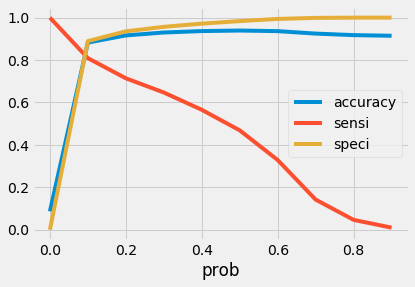

In [123]:
#Accuracy, Sensitivity, Specificity
cal_params(y_train_pred_final)

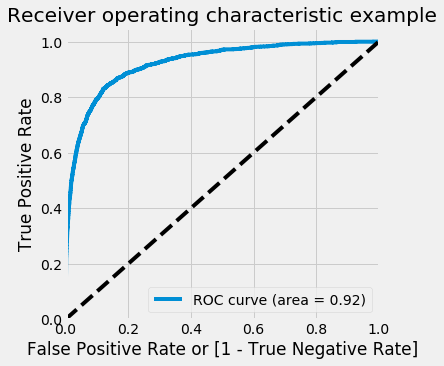

,Accuracy,Sens(Rcll/TPR),Specificity,FPR,Precision,true_positive,true_negative,false_positive,false_negative
LR with PCA Coff=0.5,0.8300,0.8000,0.8400,0.1600,0.3100,412,4583,897,104
LR with PCA threshold optimised,0.8300,0.8000,0.8400,0.1600,0.3100,412,4583,897,104
Random Forest with PCA,0.9200,0.2700,0.9900,0.0100,0.6500,137,5405,75,379
Random Forest with PCA Hypertuned,0.9200,0.2500,0.9900,0.0100,0.6400,130,5407,73,386
SVM with PCA,0.8900,0.7500,0.9000,0.1000,0.4100,386,4932,548,130
KNN with PCA,0.9200,0.3800,0.9700,0.0300,0.5800,195,5338,142,321
GR Boost,0.8800,0.7500,0.8900,0.1100,0.3900,386,4881,599,130


In [124]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_prob)

# Threshhold at 0.1
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_prob.map( lambda x: 1 if x > 0.10 else 0)
y_test_pred_final['final_predicted'] = y_test_pred_final.Churn_prob.map( lambda x: 1 if x > 0.1 else 0)


temp = metrics_model(y_test_pred_final['Churn'], y_test_pred_final['final_predicted'], "GR Boost")

main_metric = pd.concat([main_metric, temp])

main_metric

# 3.0 Creating a Model that can be interpreted 

- For this part of the problem we will use Logistic regression. 
- We will do first do a feature selection using RFE ( ~20 tops).
- Eleminate the features one by one using sm model parameters and VIF for eleminating multicolinearity. 
- then fit the model to sKlearn model
- finally generate model metrics to determine the quality 

In [134]:
X=telecom.drop('Churn',axis=1)
y=telecom['Churn']

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
X_train.shape, X_test.shape, y_train.shape

((23983, 149), (5996, 149), (23983,))

In [137]:
# scaling using StandardScaler scaler
scaler=StandardScaler()
X_train[X_train.columns]=scaler.fit_transform(X_train[X_train.columns])
X_test[X_train.columns]=scaler.transform(X_test[X_train.columns])
X[X_train.columns]=scaler.fit_transform(X[X_train.columns])

In [138]:
X.describe()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_8,aon,vbc_3g_8,arpu_67avg,onnet_mou_67avg,offnet_mou_67avg,roam_ic_mou_67avg,roam_og_mou_67avg,loc_og_t2t_mou_67avg,loc_og_t2m_mou_67avg,loc_og_t2f_mou_67avg,loc_og_t2c_mou_67avg,loc_og_mou_67avg,std_og_t2t_mou_67avg,std_og_t2m_mou_67avg,std_og_t2f_mou_67avg,std_og_mou_67avg,isd_og_mou_67avg,spl_og_mou_67avg,total_og_mou_67avg,loc_ic_t2t_mou_67avg,loc_ic_t2m_mou_67avg,loc_ic_t2f_mou_67avg,loc_ic_mou_67avg,std_ic_t2t_mou_67avg,std_ic_t2m_mou_67avg,std_ic_t2f_mou_67avg,std_ic_mou_67avg,total_ic_mou_67avg,spl_ic_mou_67avg,isd_ic_mou_67avg,ic_others_67avg,total_rech_num_67avg,total_rech_amt_67avg,max_rech_amt_67avg,last_day_rch_amt_67avg,total_rech_data_67avg,max_rech_data_67avg,count_rech_2g_67avg,count_rech_3g_67avg,av_rech_amt_data_67avg,vol_2g_mb_67avg,vol_3g_mb_67avg,arpu_3g_67avg,arpu_2g_67avg,monthly_2g_67avg,sachet_2g_67avg,monthly_3g_67avg,sachet_3g_67avg,fb_user_67avg,vbc_3g_67avg,arpu_change,onnet_mou_change,offnet_mou_change,roam_ic_mou_change,roam_og_mou_change,loc_og_t2t_mou_change,loc_og_t2m_mou_change,loc_og_t2f_mou_change,loc_og_t2c_mou_change,loc_og_mou_change,std_og_t2t_mou_change,std_og_t2m_mou_change,std_og_t2f_mou_change,std_og_mou_change,isd_og_mou_change,spl_og_mou_change,total_og_mou_change,loc_ic_t2t_mou_change,loc_ic_t2m_mou_change,loc_ic_t2f_mou_change,loc_ic_mou_change,std_ic_t2t_mou_change,std_ic_t2m_mou_change,std_ic_t2f_mou_change,std_ic_mou_change,total_ic_mou_change,spl_ic_mou_change,isd_ic_mou_change,ic_others_change,total_rech_num_change,total_rech_amt_change,max_rech_amt_change,last_day_rch_amt_change,total_rech_data_change,max_rech_data_change,count_rech_2g_change,count_rech_3g_change,av_rech_amt_data_change,vol_2g_mb_change,vol_3g_mb_change,arpu_3g_change,arpu_2g_change,monthly_2g_change,sachet_2g_change,monthly_3g_change,sachet_3g_change,fb_user_change,vbc_3g_change,tot_og_to_ic_mou_67avg,tot_og_to_ic_mou_8,total_vol_67avg,total_vol_8
count,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,29979.0000,

In [139]:
log_reg=LogisticRegression( class_weight='balanced', random_state=42)

## 3.1 RFE (Recursive Feature Selection)

In [140]:
rfe = RFE(log_reg,20)  
rfe = rfe.fit(X_train, y_train)

In [142]:
pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)),columns=[['Feature','Present','feature_rank']])

,Feature,Present,feature_rank
0,arpu_8,False,4
1,onnet_mou_8,False,36
2,offnet_mou_8,False,66
3,roam_ic_mou_8,False,122
4,roam_og_mou_8,False,50
5,loc_og_t2t_mou_8,True,1
6,loc_og_t2m_mou_8,True,1
7,loc_og_t2f_mou_8,False,51
8,loc_og_t2c_mou_8,False,31
9,loc_og_mou_8,True,1


In [143]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]

In [144]:
col

Index(['loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8', 'std_og_mou_8',
       'total_og_mou_8', 'loc_ic_t2m_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'max_rech_data_8', 'aon',
       'loc_og_mou_67avg', 'std_og_mou_67avg', 'total_og_mou_67avg',
       'total_rech_amt_67avg', 'loc_ic_t2m_mou_change', 'loc_ic_mou_change',
       'total_ic_mou_change', 'tot_og_to_ic_mou_8'],
      dtype='object')

In [145]:
#statsmodel to find significant variables
X_train_rfe_new = sm.add_constant(X_train_rfe)
log_reg_sm = sm.OLS(y_train,X_train_rfe_new).fit() 
print(log_reg_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     301.0
Date:                Tue, 30 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:41:21   Log-Likelihood:                -899.56
No. Observations:               23983   AIC:                             1841.
Df Residuals:                   23962   BIC:                             2011.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.08

### 3.1.1 Using VIF and SM to eleminate features not needed

In [146]:
vif = pd.DataFrame()
X = X_train_rfe_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,loc_og_mou_8,23.7600
14,std_og_mou_67avg,18.6800
15,total_og_mou_67avg,18.3000
5,total_og_mou_8,16.1300
4,std_og_mou_8,13.8400
13,loc_og_mou_67avg,10.0100
2,loc_og_t2m_mou_8,9.8000
18,loc_ic_mou_change,6.8300
6,loc_ic_t2m_mou_8,5.1400
19,total_ic_mou_change,4.3500


In [147]:
X_train_rfe.drop('loc_og_mou_8',axis=1, inplace=True)

In [148]:
#statsmodel to find significant variables
X_train_rfe_new = sm.add_constant(X_train_rfe)
log_reg_sm = sm.OLS(y_train,X_train_rfe_new).fit() 
print(log_reg_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     312.8
Date:                Tue, 30 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:41:22   Log-Likelihood:                -930.09
No. Observations:               23983   AIC:                             1900.
Df Residuals:                   23963   BIC:                             2062.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.08

In [149]:
vif = pd.DataFrame()
X = X_train_rfe_new.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,std_og_mou_67avg,18.4300
13,total_og_mou_67avg,17.9800
3,total_og_mou_8,12.1100
2,std_og_mou_8,10.9300
11,loc_og_mou_67avg,9.0700
16,loc_ic_mou_change,6.7700
4,loc_ic_t2m_mou_8,5.0800
17,total_ic_mou_change,4.3300
15,loc_ic_t2m_mou_change,4.2600
1,loc_og_t2m_mou_8,4.2500


In [150]:
X_train_rfe.drop('loc_og_t2m_mou_8',axis=1, inplace=True)

In [151]:
#statsmodel to find significant variables
X_train_rfe_new = sm.add_constant(X_train_rfe)
log_reg_sm = sm.OLS(y_train,X_train_rfe_new).fit() 
print(log_reg_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     330.2
Date:                Tue, 30 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:41:23   Log-Likelihood:                -930.37
No. Observations:               23983   AIC:                             1899.
Df Residuals:                   23964   BIC:                             2052.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.08

In [152]:
vif = pd.DataFrame()
X = X_train_rfe_new.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,std_og_mou_67avg,17.2400
12,total_og_mou_67avg,16.1600
2,total_og_mou_8,9.3900
1,std_og_mou_8,9.3600
10,loc_og_mou_67avg,7.1300
15,loc_ic_mou_change,6.7000
3,loc_ic_t2m_mou_8,4.4700
16,total_ic_mou_change,4.3300
14,loc_ic_t2m_mou_change,4.2500
4,total_ic_mou_8,4.0400


In [153]:
X_train_rfe.drop('std_og_mou_67avg',axis=1, inplace=True)

In [154]:
#statsmodel to find significant variables
X_train_rfe_new = sm.add_constant(X_train_rfe)
log_reg_sm = sm.OLS(y_train,X_train_rfe_new).fit() 
print(log_reg_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     336.6
Date:                Tue, 30 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:41:25   Log-Likelihood:                -1019.2
No. Observations:               23983   AIC:                             2074.
Df Residuals:                   23965   BIC:                             2220.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.08

In [155]:
X_train_rfe.drop('std_og_mou_8',axis=1, inplace=True) 

In [156]:
#statsmodel to find significant variables
X_train_rfe_new = sm.add_constant(X_train_rfe)
log_reg_sm = sm.OLS(y_train,X_train_rfe_new).fit() 
print(log_reg_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     357.7
Date:                Tue, 30 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:41:25   Log-Likelihood:                -1019.2
No. Observations:               23983   AIC:                             2072.
Df Residuals:                   23966   BIC:                             2210.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.08

In [157]:
vif = pd.DataFrame()
X = X_train_rfe_new.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,loc_ic_mou_change,6.6500
2,loc_ic_t2m_mou_8,4.3800
14,total_ic_mou_change,4.3000
12,loc_ic_t2m_mou_change,4.2500
3,total_ic_mou_8,4.0000
10,total_og_mou_67avg,3.0700
1,total_og_mou_8,2.9400
9,loc_og_mou_67avg,2.8200
0,loc_og_t2t_mou_8,2.1300
11,total_rech_amt_67avg,1.7800


In [158]:
X_train_rfe.drop('loc_ic_t2m_mou_8',axis=1, inplace=True)

In [159]:
#statsmodel to find significant variables
X_train_rfe_new = sm.add_constant(X_train_rfe)
log_reg_sm = sm.OLS(y_train,X_train_rfe_new).fit() 
print(log_reg_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     381.5
Date:                Tue, 30 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:41:26   Log-Likelihood:                -1019.2
No. Observations:               23983   AIC:                             2070.
Df Residuals:                   23967   BIC:                             2200.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.08

In [160]:
vif = pd.DataFrame()
X = X_train_rfe_new.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,loc_ic_mou_change,6.6400
13,total_ic_mou_change,4.1200
11,loc_ic_t2m_mou_change,3.9300
9,total_og_mou_67avg,3.0200
1,total_og_mou_8,2.9300
8,loc_og_mou_67avg,2.3800
0,loc_og_t2t_mou_8,2.0400
2,total_ic_mou_8,1.8000
10,total_rech_amt_67avg,1.7800
4,total_rech_num_8,1.4000


In [161]:
X_train_rfe.drop('loc_og_t2t_mou_8',axis=1, inplace=True) 

In [162]:
#statsmodel to find significant variables
X_train_rfe_new = sm.add_constant(X_train_rfe)
log_reg_sm = sm.OLS(y_train,X_train_rfe_new).fit() 
print(log_reg_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     408.7
Date:                Tue, 30 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:41:27   Log-Likelihood:                -1019.5
No. Observations:               23983   AIC:                             2069.
Df Residuals:                   23968   BIC:                             2190.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.08

In [163]:
vif = pd.DataFrame()
X = X_train_rfe_new.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,loc_ic_mou_change,6.5800
12,total_ic_mou_change,4.1100
10,loc_ic_t2m_mou_change,3.9300
8,total_og_mou_67avg,2.9700
0,total_og_mou_8,2.7700
1,total_ic_mou_8,1.7800
9,total_rech_amt_67avg,1.7800
7,loc_og_mou_67avg,1.6800
3,total_rech_num_8,1.4000
4,last_day_rch_amt_8,1.3100


In [164]:
X_train_rfe.drop('loc_ic_mou_change',axis=1, inplace=True) 

In [165]:
#statsmodel to find significant variables
X_train_rfe_new = sm.add_constant(X_train_rfe)
log_reg_sm = sm.OLS(y_train,X_train_rfe_new).fit() 
print(log_reg_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     439.0
Date:                Tue, 30 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:41:28   Log-Likelihood:                -1025.8
No. Observations:               23983   AIC:                             2080.
Df Residuals:                   23969   BIC:                             2193.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.08

In [166]:
vif = pd.DataFrame()
X = X_train_rfe_new.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,total_og_mou_67avg,2.9700
0,total_og_mou_8,2.7700
11,total_ic_mou_change,2.5800
10,loc_ic_t2m_mou_change,2.2500
1,total_ic_mou_8,1.7800
9,total_rech_amt_67avg,1.7800
7,loc_og_mou_67avg,1.6700
3,total_rech_num_8,1.4000
4,last_day_rch_amt_8,1.3100
5,max_rech_data_8,1.2000


In [167]:
# this is a pretty decent list of variables which are primary conrtributor to the final LR model 
len(X.columns), X.columns

(13,
 Index(['total_og_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
        'last_day_rch_amt_8', 'max_rech_data_8', 'aon', 'loc_og_mou_67avg',
        'total_og_mou_67avg', 'total_rech_amt_67avg', 'loc_ic_t2m_mou_change',
        'total_ic_mou_change', 'tot_og_to_ic_mou_8'],
       dtype='object'))

##  3.2 Building the final model using SKlearn 

In [168]:
#initialising variables 
X_train=X_train[X.columns]
X_test=X_test[X.columns]

In [169]:
#initialising another log regression model 
lr_int_model=LogisticRegression( class_weight='balanced', random_state=42)
lr_int_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [170]:
y_train_pred = lr_int_model.predict(X_train)
y_train_prob = lr_int_model.predict_proba(X_train)[:,1]
y_test_pred = lr_int_model.predict(X_test)
y_test_prob = lr_int_model.predict_proba(X_test)[:,1]

In [171]:
temp = metrics_model(y_test, y_test_pred, "LR intepretable model basic")

main_metric = pd.concat([main_metric, temp])

main_metric

,Accuracy,Sens(Rcll/TPR),Specificity,FPR,Precision,true_positive,true_negative,false_positive,false_negative
LR with PCA Coff=0.5,0.8300,0.8000,0.8400,0.1600,0.3100,412,4583,897,104
LR with PCA threshold optimised,0.8300,0.8000,0.8400,0.1600,0.3100,412,4583,897,104
Random Forest with PCA,0.9200,0.2700,0.9900,0.0100,0.6500,137,5405,75,379
Random Forest with PCA Hypertuned,0.9200,0.2500,0.9900,0.0100,0.6400,130,5407,73,386
SVM with PCA,0.8900,0.7500,0.9000,0.1000,0.4100,386,4932,548,130
KNN with PCA,0.9200,0.3800,0.9700,0.0300,0.5800,195,5338,142,321
GR Boost,0.8800,0.7500,0.8900,0.1100,0.3900,386,4881,599,130
LR intepretable model basic,0.8300,0.8000,0.8300,0.1700,0.3100,414,4549,931,102


## 3.3 Logistic Regression Model (Cutoff tuned for threshhold)

In [172]:

y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_pred':y_train_pred, 'Churn_prob':y_train_prob})
y_train_pred_final['S No'] = y_train.index
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_pred':y_test_pred, 'Churn_prob':y_test_prob})
y_test_pred_final['S No'] = y_test.index

In [173]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()


,Churn,Churn_pred,Churn_prob,S No,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0,0.2395,62446,1,1,1,0,0,0,0,0,0,0
1,0,1,0.6120,28589,1,1,1,1,1,1,1,0,0,0
2,0,0,0.0792,77944,1,0,0,0,0,0,0,0,0,0
3,0,0,0.0518,34583,1,0,0,0,0,0,0,0,0,0
4,0,1,0.7975,97270,1,1,1,1,1,1,1,1,0,0


         prob  accuracy  sensi  speci
0.0000 0.0000    0.0864 1.0000 0.0000
0.1000 0.1000    0.4044 0.9744 0.3505
0.2000 0.2000    0.5665 0.9445 0.5308
0.3000 0.3000    0.6736 0.9050 0.6517
0.4000 0.4000    0.7595 0.8717 0.7488
0.5000 0.5000    0.8239 0.8254 0.8237
0.6000 0.6000    0.8712 0.7795 0.8799
0.7000 0.7000    0.9023 0.7053 0.9210
0.8000 0.8000    0.9224 0.5904 0.9539
0.9000 0.9000    0.9217 0.2798 0.9824


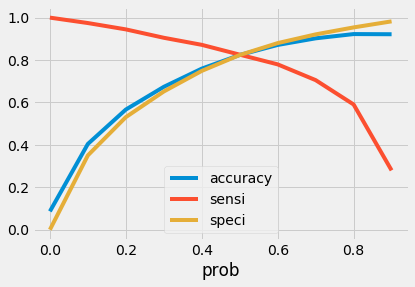

In [174]:
# plotting accuracy, Sensitivity, Specificity to get an idea of a viable cutoff 
cal_params(y_train_pred_final)


In [175]:
# 0.5 seems a good cutoff for this model aswell 

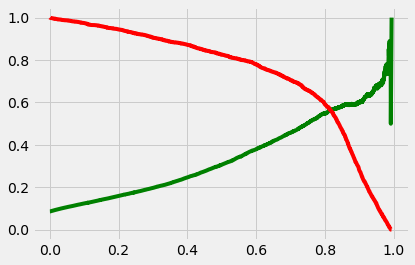

In [176]:
#precision , recall
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

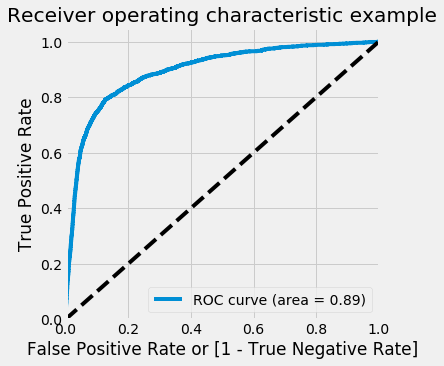

In [177]:
# ROC curve

draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_prob)

In [178]:
# Threshhold comes at same as default  at 0.5 from Accuracy, Sensitivity, Specificity curve 

y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_prob.map( lambda x: 1 if x > 0.5 else 0)
y_test_pred_final['final_predicted'] = y_test_pred_final.Churn_prob.map( lambda x: 1 if x > 0.5 else 0)


temp = metrics_model(y_test_pred_final['Churn'], y_test_pred_final['final_predicted'], "LR inter. threshold optimised")

main_metric = pd.concat([main_metric, temp])

In [179]:
Fea_imp=pd.DataFrame({"Feature":X_train.columns,"Order":np.abs(lr_int_model.coef_[0]),"coefficient":lr_int_model.coef_[0]}, ).sort_values(by="Order", ascending=False)

# Conclusion 

#### 1. EDA lends the follwoing observations 

- Average Revenue for Churned Customers is less for month 8 as compared to Unchurned users
- Total outgoing for churned users is less for month 8 as compared to unchurned users. 
- Total incoming for churned users is less for month 8 as compared to unchurned users.
- Total recharge amount for churned users is less for month 8 as compared to unchurned users.
- Max recharge amount for churned users is less for month 8 as compared to unchurned users.
- Total recharge amount for churned users is less for month 8 as compared to unchurned users.
- Newer customers ( based on AON) tend to churn as compared to older customers 
- Local incoming from within the network and outside network for churned users is less for month 8 as compared to unchurned users.
- Significant drop in FB usage in month 8 for Churned customers and no change for Unchurned customers. 


#### 2. Sevaral models were used to predict churn. The following are their performance :

In [180]:
main_metric

,Accuracy,Sens(Rcll/TPR),Specificity,FPR,Precision,true_positive,true_negative,false_positive,false_negative
LR with PCA Coff=0.5,0.8300,0.8000,0.8400,0.1600,0.3100,412,4583,897,104
LR with PCA threshold optimised,0.8300,0.8000,0.8400,0.1600,0.3100,412,4583,897,104
Random Forest with PCA,0.9200,0.2700,0.9900,0.0100,0.6500,137,5405,75,379
Random Forest with PCA Hypertuned,0.9200,0.2500,0.9900,0.0100,0.6400,130,5407,73,386
SVM with PCA,0.8900,0.7500,0.9000,0.1000,0.4100,386,4932,548,130
KNN with PCA,0.9200,0.3800,0.9700,0.0300,0.5800,195,5338,142,321
GR Boost,0.8800,0.7500,0.8900,0.1100,0.3900,386,4881,599,130
LR intepretable model basic,0.8300,0.8000,0.8300,0.1700,0.3100,414,4549,931,102
LR inter. threshold optimised,0.8300,0.8000,0.8300,0.1700,0.3100,414,4549,931,102


### Best Model: 

As per the business objective, it is far costlier to gain new customers, than it is to retain existing customers. In such a scenario, when the models will have trade offs , <b>it is better to have a model with high Sensitivity ( Recall) and compramise on other parameters.   Therefore, Logistic Regression models, SVM model and GR Boost model seem to be the best. </b> Random Forest, KNN models do not perform well. 

#### 3. The followng features have been identified by the LR model as bein critical for the model. Their relative importance have been mentioned in decreasing order.

In [181]:
Fea_imp

,Feature,Order,coefficient
1,total_ic_mou_8,0.8009,-0.8009
0,total_og_mou_8,0.7458,-0.7458
5,max_rech_data_8,0.7098,-0.7098
9,total_rech_amt_67avg,0.5530,0.5530
4,last_day_rch_amt_8,0.5318,-0.5318
2,spl_ic_mou_8,0.3932,-0.3932
3,total_rech_num_8,0.3498,-0.3498
6,aon,0.3296,-0.3296
7,loc_og_mou_67avg,0.3106,-0.3106
12,tot_og_to_ic_mou_8,0.2571,-0.2571


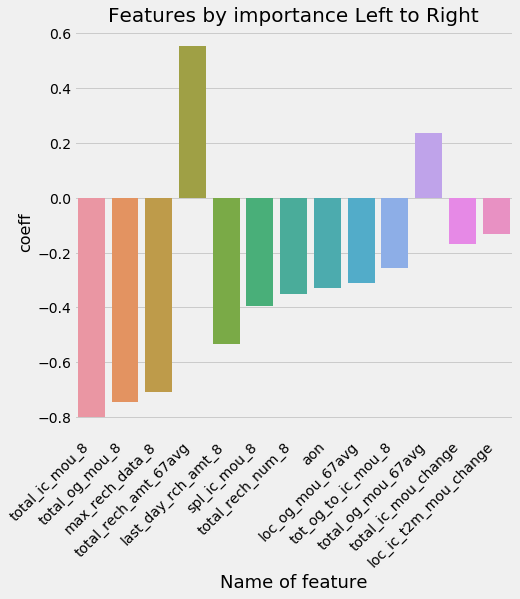

In [184]:
fig = plt.figure(figsize = [7,7])
sns.barplot(data=Fea_imp, x="Feature", y="coefficient")
plt.xticks(rotation=45, ha='right')
plt.title('Features by importance Left to Right', fontsize = 20)              # Plot heading 
plt.xlabel('Name of feature', fontsize = 18)                          # X-label
plt.ylabel('coeff', fontsize = 16)  
plt.show()

#### 4. Recommendations 

1. The business should monitor appreciable change on the parameters mentioned on the EDA conlusions. They will serve as indicators for potential churn on customers. 
2. Model should also be used to identify chrun and promotional offers made to potential Churn customers 